## თამთა თოფურია
mail: ttopu18@freeuni.edu.ge

<br>
<br>
disclaimer: notebook-ის ახლიდან გაშვების შემთხვევაში SOM-ით დაგენერირებული გრაფები შეიცვლება (არ მაქვს და-seed-ული).

---

# კლასიფიკაციის ამოცანა

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [184]:
import os
path = os.getcwd() + '/Train.csv'
trainedData = pd.read_csv(path, header=0)
trainedData.head()

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A

მოვაცილოთ მონაცემებს სეგმენტაციის სვეტი

In [185]:
trainData = trainedData.drop(['Segmentation'], axis=1)

In [186]:
trainData

ID  Gender Ever_Married  Age Graduated     Profession  \
0     462809    Male           No   22        No     Healthcare   
1     462643  Female          Yes   38       Yes       Engineer   
2     466315  Female          Yes   67       Yes       Engineer   
3     461735    Male          Yes   67       Yes         Lawyer   
4     462669  Female          Yes   40       Yes  Entertainment   
...      ...     ...          ...  ...       ...            ...   
8063  464018    Male           No   22        No            NaN   
8064  464685    Male           No   35        No      Executive   
8065  465406  Female           No   33       Yes     Healthcare   
8066  467299  Female           No   27       Yes     Healthcare   
8067  461879    Male          Yes   37       Yes      Executive   

      Work_Experience Spending_Score  Family_Size  Var_1  
0                 1.0            Low          4.0  Cat_4  
1                 NaN        Average          3.0  Cat_4  
2                 1.0            Low          1.0  Cat_6  
3                 0.0           High          2.0  Cat_6  
4                 NaN           High          6.0  Cat_6  
...               ...            ...          ...    ...  
8063              0.0            Low          7.0  Cat_1  
8064              3.0            Low          4.0  Cat_4  
8065              1.0            Low          1.0  Cat_6  
8066              1.0            Low          4.0  Cat_6  
8067              0.0        Average          3.0  Cat_4  

[8068 rows x 10 columns]

ამოცანაში გვაქვს ასევე testData, თუმცა ჩვენ unsupervised სწავლება გვაქვს, შესაბამისად ვერ გავტესტავთ პასუხის სისწორეს და ჯობია გავაერთიანოთ ეს მონაცემები.

In [187]:
path = os.getcwd() + '/Test.csv'
testData = pd.read_csv(path, header=0)
testData.head()

ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996  Female          Yes   69        No         NaN              0.0   
3  459000    Male          Yes   59        No   Executive             11.0   
4  459001  Female           No   19        No   Marketing              NaN   

  Spending_Score  Family_Size  Var_1  
0            Low          1.0  Cat_6  
1        Average          4.0  Cat_6  
2            Low          1.0  Cat_6  
3           High          2.0  Cat_6  
4            Low          4.0  Cat_6

In [188]:
data = pd.concat([trainData, testData])
data = data.drop(['ID'], axis=1)
initData = data.copy()

In [189]:
data.describe()

Age  Work_Experience   Family_Size
count  10695.000000      9597.000000  10247.000000
mean      43.511828         2.619777      2.844052
std       16.774158         3.390790      1.536427
min       18.000000         0.000000      1.000000
25%       30.000000         0.000000      2.000000
50%       41.000000         1.000000      3.000000
75%       53.000000         4.000000      4.000000
max       89.000000        14.000000      9.000000

9 ცვლადიდან 6 კატეგორიული გვაქვს, მათთან მუშაობის გასამარტივებლად და საჭირო ალგორითმების  გასაშვებად, ეს ცვლადები რიცვობრივად უნდა წარმოვადგინოთ

---

## Categorical --> Numeric

1. yes/no, male/female ცვლადები 1/0-ად ვაქციოთ
2. low/average/high კი 0/1/2-ად. ასე დაყოფა ლოგიკურია, რადგან შედარებისთვის გამოდგება (high > average <--> 2 > 1)
3. profession ცვლადისთვის one-hot encoding უფრო კარგი გაdაწყვტილება მგონია, რადგან პროფესი არ არის ლოგიკურად შედარებადი ცვლადი (ვერ ვიტყვით, რომ engineer > marketing)

In [190]:
data['Gender'] = np.where(data['Gender'].str.contains("Male"), 1, 0)
data['Ever_Married'] = np.where(data['Ever_Married'].str.contains("Yes"), 1, 0)
data['Graduated'] = np.where(data['Graduated'].str.contains("Yes"), 1, 0)
data['Spending_Score'] = data['Spending_Score'].map({'Low':0, 'Average': 1, 'High': 2})

In [191]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [192]:
print(data.Profession.value_counts())
print()
print(data.Var_1.value_counts())

Artist           3318
Healthcare       1750
Entertainment    1250
Engineer          935
Doctor            930
Lawyer            844
Executive         775
Marketing         403
Homemaker         328
Name: Profession, dtype: int64

Cat_6    6910
Cat_4    1475
Cat_3    1089
Cat_2     563
Cat_7     269
Cat_1     167
Cat_5     114
Name: Var_1, dtype: int64


გვინდა Nan-ების შენარჩუნებაც 

In [193]:
encoded = pd.get_dummies(data, columns=['Profession', 'Var_1'])
encoded.loc[data.Profession.isnull(), encoded.columns.str.startswith("Profession_")] = np.nan
encoded.loc[data.Var_1.isnull(), encoded.columns.str.startswith("Var_1_")] = np.nan
encoded.head()

Gender  Ever_Married  Age  Graduated  Work_Experience  Spending_Score  \
0       1             0   22          0              1.0               0   
1       0             1   38          1              NaN               1   
2       0             1   67          1              1.0               0   
3       1             1   67          1              0.0               2   
4       0             1   40          1              NaN               2   

   Family_Size  Profession_Artist  Profession_Doctor  Profession_Engineer  \
0          4.0                0.0                0.0                  0.0   
1          3.0                0.0                0.0                  1.0   
2          1.0                0.0                0.0                  1.0   
3          2.0                0.0                0.0                  0.0   
4          6.0                0.0                0.0                  0.0   

   ...  Profession_Homemaker  Profession_Lawyer  Profession_Marketing  \
0  ...                   0.0                0.0                   0.0   
1  ...                   0.0                0.0                   0.0   
2  ...                   0.0                0.0                   0.0   
3  ...                   0.0                1.0                   0.0   
4  ...                   0.0                0.0                   0.0   

   Var_1_Cat_1  Var_1_Cat_2  Var_1_Cat_3  Var_1_Cat_4  Var_1_Cat_5  \
0          0.0          0.0          0.0          1.0          0.0   
1          0.0          0.0          0.0          1.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   Var_1_Cat_6  Var_1_Cat_7  
0          0.0          0.0  
1          0.0          0.0  
2          1.0          0.0  
3          1.0          0.0  
4          1.0          0.0  

[5 rows x 23 columns]

---

ახლა ვნახოთ Nan-ების რაოდენობა სვეტების მიხედვით

<AxesSubplot:>

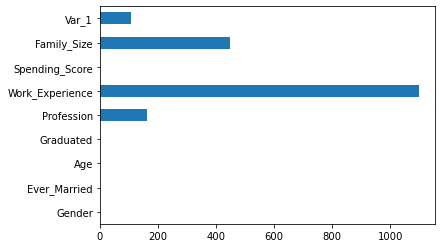

In [194]:
ser = len(data) - data.count()
ser.plot(kind='barh')

<AxesSubplot:>

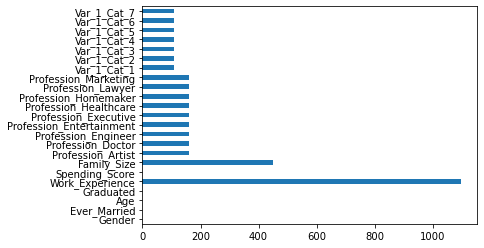

In [195]:
ser = len(encoded) - encoded.count()
ser.plot(kind='barh')

საკმაოდ ბევრი Nan გვაქვს ზოგიერთ სვეტში. მათ ჩასანაცვლებლად გამოვიყენოთ knn ალგორითმი, რომელიც ასე მუშაობს: ვთქვათ X სვეტში გვაქვს ჩასანაცვლებელი Nan. knn აიღებს სხვა ცვლადებით მსგავს k ცალ მაგალითს და მათი X სვეტის საშუალო მნიშვნელობას ჩაგვიწერს Nan-ის მაგივრად.

## KNN

რადგან knn ეყრდნობა ევკლიდური მანძილების გამოთვლასა და შედარებას, ვფიქრობ, ნორმალიზება საჭიროა კარგი შედეგის მისაღებად. ამიტომ ახლავე დავანორმალიზოთ არაკატეგორიული მონაცემები

In [196]:
def normalize(data, cols_to_norm):
    data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.mean()) / x.std())

In [197]:
data = encoded
cols_to_norm = ['Age', 'Work_Experience', 'Family_Size']
normalize(data, cols_to_norm)
data.describe()

Gender  Ever_Married           Age     Graduated  \
count  10695.000000  10695.000000  1.069500e+04  10695.000000   
mean       0.546143      0.594016 -2.032969e-16      0.623843   
std        0.497890      0.491104  1.000000e+00      0.484443   
min        0.000000      0.000000 -1.520901e+00      0.000000   
25%        0.000000      0.000000 -8.055145e-01      0.000000   
50%        1.000000      1.000000 -1.497439e-01      1.000000   
75%        1.000000      1.000000  5.656422e-01      1.000000   
max        1.000000      1.000000  2.711801e+00      1.000000   

       Work_Experience  Spending_Score   Family_Size  Profession_Artist  \
count     9.597000e+03    10695.000000  1.024700e+04       10533.000000   
mean      6.663420e-18        0.542590 -2.253600e-17           0.315010   
std       1.000000e+00        0.740146  1.000000e+00           0.464542   
min      -7.726156e-01        0.000000 -1.200221e+00           0.000000   
25%      -7.726156e-01        0.000000 -5.493602e-01           0.000000   
50%      -4.776991e-01        0.000000  1.015005e-01           0.000000   
75%       4.070506e-01        1.000000  7.523611e-01           1.000000   
max       3.356216e+00        2.000000  4.006664e+00           1.000000   

       Profession_Doctor  Profession_Engineer  ...  Profession_Homemaker  \
count       10533.000000         10533.000000  ...          10533.000000   
mean            0.088294             0.088769  ...              0.031140   
std             0.283735             0.284423  ...              0.173705   
min             0.000000             0.000000  ...              0.000000   
25%             0.000000             0.000000  ...              0.000000   
50%             0.000000             0.000000  ...              0.000000   
75%             0.000000             0.000000  ...              0.000000   
max             1.000000             1.000000  ...              1.000000   

       Profession_Lawyer  Profession_Marketing   Var_1_Cat_1   Var_1_Cat_2  \
count       10533.000000          10533.000000  10587.000000  10587.000000   
mean            0.080129              0.038261      0.015774      0.053178   
std             0.271506              0.191834      0.124606      0.224400   
min             0.000000              0.000000      0.000000      0.000000   
25%             0.000000              0.000000      0.000000      0.000000   
50%             0.000000              0.000000      0.000000      0.000000   
75%             0.000000              0.000000      0.000000      0.000000   
max             1.000000              1.000000      1.000000      1.000000   

        Var_1_Cat_3   Var_1_Cat_4   Var_1_Cat_5   Var_1_Cat_6   Var_1_Cat_7  
count  10587.000000  10587.000000  10587.000000  10587.000000  10587.000000  
mean       0.102862      0.139322      0.010768      0.652687      0.025409  
std        0.303793      0.346298      0.103213      0.476139      0.157370  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      1.000000      0.000000  
75%        0.000000      0.000000      0.000000      1.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000      1.000000  

[8 rows x 23 columns]

In [198]:
data.isna().any()

Gender                      False
Ever_Married                False
Age                         False
Graduated                   False
Work_Experience              True
Spending_Score              False
Family_Size                  True
Profession_Artist            True
Profession_Doctor            True
Profession_Engineer          True
Profession_Entertainment     True
Profession_Executive         True
Profession_Healthcare        True
Profession_Homemaker         True
Profession_Lawyer            True
Profession_Marketing         True
Var_1_Cat_1                  True
Var_1_Cat_2                  True
Var_1_Cat_3                  True
Var_1_Cat_4                  True
Var_1_Cat_5                  True
Var_1_Cat_6                  True
Var_1_Cat_7                  True
dtype: bool

პარამეტრები: 
1. n_neighbors: Nan მნიშვნელობიანი მაგალითის უახლოესი (სხვა ცვლადების მიხედვით ყველზე პატარა ევკლიდური მანძილი) მაგალითების რაოდენობა. ჩვენ 5 ავიღოთ.

In [199]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data), columns = data.columns)

In [200]:
data

Gender  Ever_Married       Age  Graduated  Work_Experience  \
0         1.0           0.0 -1.282439        0.0        -0.477699   
1         0.0           1.0 -0.328590        1.0         0.230101   
2         0.0           1.0  1.400259        1.0        -0.477699   
3         1.0           1.0  1.400259        1.0        -0.772616   
4         0.0           1.0 -0.209359        1.0        -0.241766   
...       ...           ...       ...        ...              ...   
10690     1.0           0.0 -0.865130        0.0         1.881633   
10691     0.0           0.0 -0.507437        1.0        -0.477699   
10692     0.0           0.0  0.565642        1.0         0.348067   
10693     1.0           1.0  0.207949        1.0        -0.477699   
10694     0.0           0.0 -0.030513        1.0         1.881633   

       Spending_Score  Family_Size  Profession_Artist  Profession_Doctor  \
0                 0.0     0.752361                0.0                0.0   
1                 1.0     0.101500                0.0                0.0   
2                 0.0    -1.200221                0.0                0.0   
3                 2.0    -0.549360                0.0                0.0   
4                 2.0     2.054082                0.0                0.0   
...               ...          ...                ...                ...   
10690             0.0     0.752361                0.0                0.0   
10691             0.0    -1.200221                0.0                1.0   
10692             0.0    -0.549360                0.0                0.0   
10693             2.0     1.403222                0.0                0.0   
10694             0.0     0.101500                0.0                0.0   

       Profession_Engineer  ...  Profession_Homemaker  Profession_Lawyer  \
0                      0.0  ...                   0.0                0.0   
1                      1.0  ...                   0.0                0.0   
2                      1.0  ...                   0.0                0.0   
3                      0.0  ...                   0.0                1.0   
4                      0.0  ...                   0.0                0.0   
...                    ...  ...                   ...                ...   
10690                  0.0  ...                   0.0                0.0   
10691                  0.0  ...                   0.0                0.0   
10692                  0.0  ...                   0.0                0.0   
10693                  0.0  ...                   0.0                0.0   
10694                  0.0  ...                   0.0                0.0   

       Profession_Marketing  Var_1_Cat_1  Var_1_Cat_2  Var_1_Cat_3  \
0                       0.0          0.0          0.0          0.0   
1                       0.0          0.0          0.0          0.0   
2                       0.0          0.0          0.0          0.0   
3                       0.0          0.0          0.0          0.0   
4                       0.0          0.0          0.0          0.0   
...                     ...          ...          ...          ...   
10690                   0.0          0.0          0.0          0.0   
10691                   0.0          0.0          0.0          0.0   
10692                   0.0          0.0          0.0          0.0   
10693                   0.0          0.0          0.0          0.0   
10694                   0.0          0.0          0.0          0.0   

       Var_1_Cat_4  Var_1_Cat_5  Var_1_Cat_6  Var_1_Cat_7  
0              1.0          0.0          0.0          0.0  
1              1.0          0.0          0.0          0.0  
2              0.0          0.0          1.0          0.0  
3              0.0          0.0          1.0          0.0  
4              0.0          0.0          1.0          0.0  
...            ...          ...          ...          ...  
10690          0.0          0.0          1.0          0.0  
10691          0.0          0.0

In [201]:
data.isna().any()

Gender                      False
Ever_Married                False
Age                         False
Graduated                   False
Work_Experience             False
Spending_Score              False
Family_Size                 False
Profession_Artist           False
Profession_Doctor           False
Profession_Engineer         False
Profession_Entertainment    False
Profession_Executive        False
Profession_Healthcare       False
Profession_Homemaker        False
Profession_Lawyer           False
Profession_Marketing        False
Var_1_Cat_1                 False
Var_1_Cat_2                 False
Var_1_Cat_3                 False
Var_1_Cat_4                 False
Var_1_Cat_5                 False
Var_1_Cat_6                 False
Var_1_Cat_7                 False
dtype: bool

აღარ გვაქვს NA-ები. ახლა შეგვიძლია ვნახოთ თითოეული ცვლადის ვიზუალიზაცია

---

## data-ს ვიზუალიზაცია

In [202]:
#Gender 	Ever_Married 	Age 	Graduated 	Profession 	Work_Experience 	Spending_Score 	Family_Size 	Var_1

In [203]:
def visualizePies(data):
    plt.figure(1)
    plt.subplot(331)
    data['Gender'].value_counts().plot.pie(title='% distribution of Gender',figsize=(20,20),autopct="%1.1f",explode=[0,.1])

    plt.subplot(332)
    data['Ever_Married'].value_counts().plot.pie(title='% distribution of Ever Married',autopct="%1.1f",explode=[0,.1])

    plt.subplot(333)
    data['Graduated'].value_counts().plot.pie(title='% distribution of Graduated',autopct="%1.1f",explode=[0,.1])

    plt.subplot(334)
    data['Profession'].value_counts().plot.pie(title='% distribution of Work Profession',autopct="%1.1f")

    plt.subplot(335)
    data['Spending_Score'].value_counts().plot.pie(title='% distribution of Spending Score',autopct="%1.1f",explode=[0,.1, 0.1])

    # plt.subplot(336)
    # initData['Family_Size'].value_counts().plot.pie(title='% distribution of Family Size',autopct="%1.1f",explode=[0,.1])
    # plt.show()

    plt.subplot(336)
    initData['Var_1'].value_counts().plot.pie(title='% distribution of Var_1',autopct="%1.1f")
    plt.show()

In [204]:
def visualizeHist(data):
    sns.histplot(data=data, x='Age')

In [205]:
def visualizeBars(data):
    f, ax = plt.subplots(1, 2, figsize=(18, 6))
    sns.countplot(data=data, x="Work_Experience", ax=ax[0], palette="Accent", alpha=0.7)
    sns.countplot(data=data, x="Family_Size", ax=ax[1], palette="Accent", alpha=0.7)

In [206]:
def visualize(initData):
    visualizePies(initData)
    visualizeHist(initData)
    visualizeBars(initData)

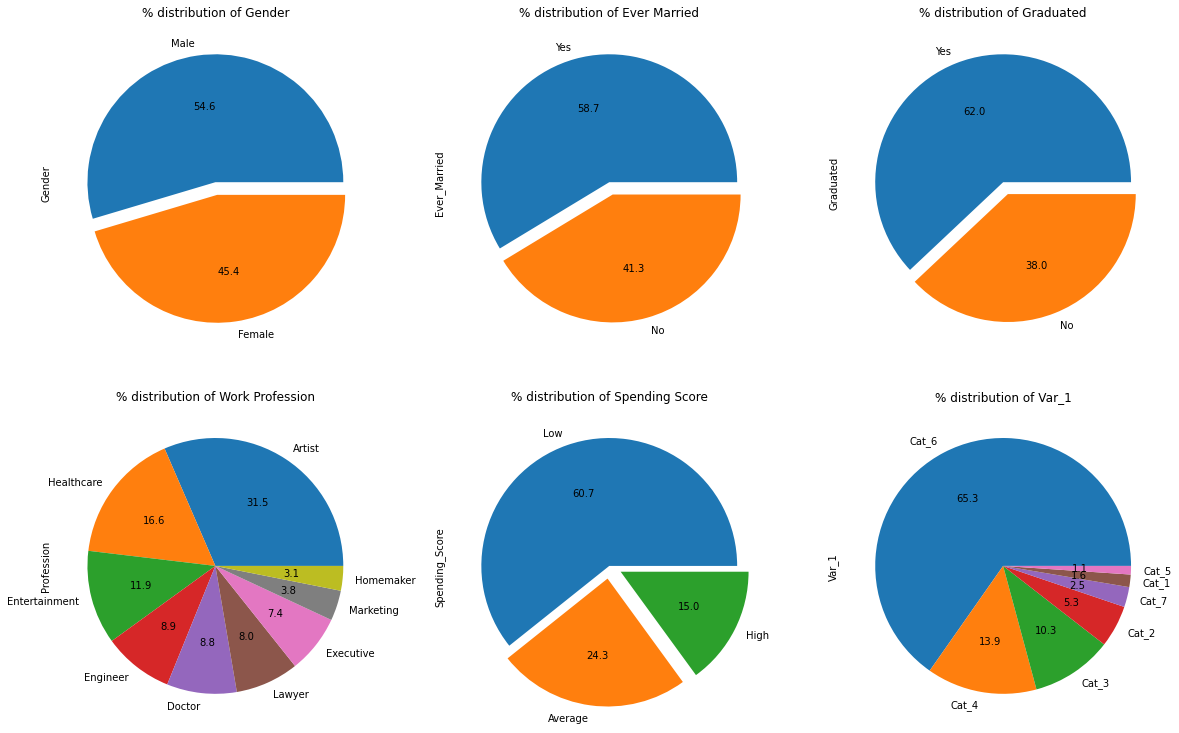

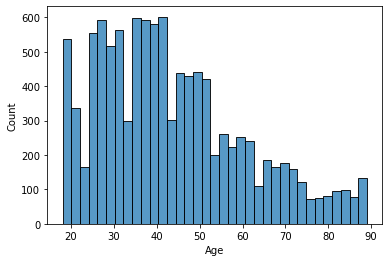

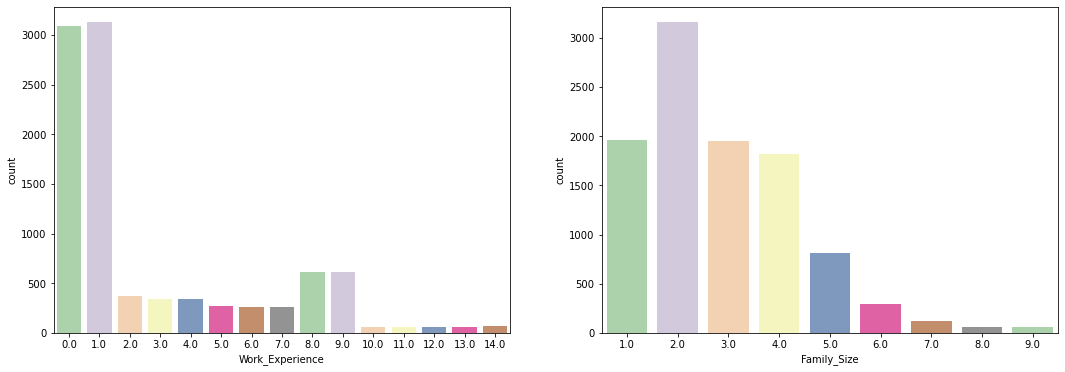

In [207]:
visualize(initData)

მონაცემები უკვე მომზადებულია: აღარ გვაქვს NA-ები, ყველა ცვლადი რიცხვობრივია. შეგვიძლია დავიწყოთ კლასტერიზაციის ალგორითმების გაშვება. დავიწყოთ k-Means-ით

---

## K-Means

სანამ K-means-ს გავუშვებთ, შევნიშნოთ, რომ one-hot encoding-ით მიღებულ პარამეტრებს sqrt(2)-ჯერ უფრო მეტი წონა აქვთ, ვიდრე დანარჩენებს ამ ალგორითმში.

მაგალითი: თუ გვაქვს იდენტური მაგალითები, თუმცა ერთ female, მეორე - male, მათ შორის ევკლისური მანძილია: sqrt(1^2)=1, თუ გვაქვს იდენტური მაგალითები, თუმცა ერთი lawyer, მეორე - artist, მათ შორის მანძილია: sqrt(1^2 + 1^2) = sqrt(2)

გადაჭრა: ამიტომ k-means-სთვის გავამრავკოთ ყველა one-hot ცვლადი 1/sqrt(2)-ზე

In [208]:
kmeansData = data.copy()
columns = ['Var_1_Cat_1', 
           'Var_1_Cat_2',
           'Var_1_Cat_3', 
           'Var_1_Cat_4', 
           'Var_1_Cat_5', 
           'Var_1_Cat_6', 
           'Var_1_Cat_7', 
           'Profession_Artist', 
           'Profession_Doctor',  
           'Profession_Engineer',
           'Profession_Entertainment',
           'Profession_Executive',
           'Profession_Healthcare',  
           'Profession_Homemaker',
           'Profession_Lawyer',
           'Profession_Marketing'
          ]
kmeansData[columns] = kmeansData[columns] * (2**(-1/2))
kmeansData

Gender  Ever_Married       Age  Graduated  Work_Experience  \
0         1.0           0.0 -1.282439        0.0        -0.477699   
1         0.0           1.0 -0.328590        1.0         0.230101   
2         0.0           1.0  1.400259        1.0        -0.477699   
3         1.0           1.0  1.400259        1.0        -0.772616   
4         0.0           1.0 -0.209359        1.0        -0.241766   
...       ...           ...       ...        ...              ...   
10690     1.0           0.0 -0.865130        0.0         1.881633   
10691     0.0           0.0 -0.507437        1.0        -0.477699   
10692     0.0           0.0  0.565642        1.0         0.348067   
10693     1.0           1.0  0.207949        1.0        -0.477699   
10694     0.0           0.0 -0.030513        1.0         1.881633   

       Spending_Score  Family_Size  Profession_Artist  Profession_Doctor  \
0                 0.0     0.752361                0.0           0.000000   
1                 1.0     0.101500                0.0           0.000000   
2                 0.0    -1.200221                0.0           0.000000   
3                 2.0    -0.549360                0.0           0.000000   
4                 2.0     2.054082                0.0           0.000000   
...               ...          ...                ...                ...   
10690             0.0     0.752361                0.0           0.000000   
10691             0.0    -1.200221                0.0           0.707107   
10692             0.0    -0.549360                0.0           0.000000   
10693             2.0     1.403222                0.0           0.000000   
10694             0.0     0.101500                0.0           0.000000   

       Profession_Engineer  ...  Profession_Homemaker  Profession_Lawyer  \
0                 0.000000  ...                   0.0           0.000000   
1                 0.707107  ...                   0.0           0.000000   
2                 0.707107  ...                   0.0           0.000000   
3                 0.000000  ...                   0.0           0.707107   
4                 0.000000  ...                   0.0           0.000000   
...                    ...  ...                   ...                ...   
10690             0.000000  ...                   0.0           0.000000   
10691             0.000000  ...                   0.0           0.000000   
10692             0.000000  ...                   0.0           0.000000   
10693             0.000000  ...                   0.0           0.000000   
10694             0.000000  ...                   0.0           0.000000   

       Profession_Marketing  Var_1_Cat_1  Var_1_Cat_2  Var_1_Cat_3  \
0                       0.0          0.0          0.0          0.0   
1                       0.0          0.0          0.0          0.0   
2                       0.0          0.0          0.0          0.0   
3                       0.0          0.0          0.0          0.0   
4                       0.0          0.0          0.0          0.0   
...                     ...          ...          ...          ...   
10690                   0.0          0.0          0.0          0.0   
10691                   0.0          0.0          0.0          0.0   
10692                   0.0          0.0          0.0          0.0   
10693                   0.0          0.0          0.0          0.0   
10694                   0.0          0.0          0.0          0.0   

       Var_1_Cat_4  Var_1_Cat_5  Var_1_Cat_6  Var_1_Cat_7  
0         0.707107          0.0     0.000000     0.000000  
1         0.707107          0.0     0.000000     0.000000  
2         0.000000          0.0     0.707107     0.000000  
3         0.000000          0.0     0.707107     0.000000  
4         0.000000          0.0     0.707107     0.000000  
...            ...          ...          ...          ...  
10690     0.000000          0.0     0.707107     0.000000  
10691     0.000000          0.0

პარამეტრები:
1. n_clusters: რამდენ კლასტერად დაყოფას ვთხოვთ ალგორითმს
2. random_state: იგივე seed, k-Means დასაწყისში აკეთებს ცენტროიდების რენდომ ინიციალიზაციას, შესაბამისად, არადეტერმინისტული გამოდის ალგორითმი და ყოველი გაშვებისას სხვადასხვა შედეგს მივიღებთ, ასე რომ არ მოხდეს მოცემულ შედეგს id-ვით ვანიჭებთ random_state რიცხვს.
3. n_init: ამდენჯერ იზამს ცენტროიდების რენდომ ინიციალიზაციას და ყვეალზე მცირე cost-იანს დააბრუნებს (ლოკალურ მინიმუმშ ჩავარდნისგან თავის ასაცილებლად)
4. verbose: დაბეჭდოს თუ არა ქოსთი

In [209]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init = 15, verbose=1).fit(kmeansData)
    inertia.append(np.sqrt(kmeans.inertia_))
    print("FINISH")

Initialization complete
Iteration 0, inertia 92999.44349438665
Iteration 1, inertia 52028.167584415445
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 98049.975995174
Iteration 1, inertia 52028.167584415445
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 89174.27096790282
Iteration 1, inertia 52028.167584415445
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 89992.00672942486
Iteration 1, inertia 52028.167584415445
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 131090.2761005773
Iteration 1, inertia 52028.167584415445
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 94734.45838669754
Iteration 1, inertia 52028.167584415445
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 157273.5464784382
Iteration 1, inertia 52028.167584415445
Conve

Iteration 22, inertia 41319.40281480533
Iteration 23, inertia 41312.04320630112
Iteration 24, inertia 41307.7975112579
Iteration 25, inertia 41304.8074314025
Iteration 26, inertia 41301.951482155055
Iteration 27, inertia 41300.05178449252
Iteration 28, inertia 41298.69457139061
Iteration 29, inertia 41298.09688831851
Iteration 30, inertia 41297.69327886832
Converged at iteration 30: center shift 1.678067978795604e-05 within tolerance 2.1150951311833733e-05.
Initialization complete
Iteration 0, inertia 67540.25470512305
Iteration 1, inertia 45548.931133606675
Iteration 2, inertia 44214.542178437485
Iteration 3, inertia 42950.854633229734
Iteration 4, inertia 42522.84115492118
Iteration 5, inertia 42336.64088487804
Iteration 6, inertia 42222.08956680573
Iteration 7, inertia 42155.5455482707
Iteration 8, inertia 42125.869445561424
Iteration 9, inertia 42107.61686985616
Iteration 10, inertia 42095.72123448868
Iteration 11, inertia 42084.535286089456
Iteration 12, inertia 42073.9690565843
I

Iteration 5, inertia 35554.11528564285
Iteration 6, inertia 35205.36312342515
Iteration 7, inertia 35060.167894305996
Iteration 8, inertia 34982.962478140435
Iteration 9, inertia 34931.40279628241
Iteration 10, inertia 34901.009841313455
Iteration 11, inertia 34883.32803673744
Iteration 12, inertia 34866.336158699305
Iteration 13, inertia 34852.65423064937
Iteration 14, inertia 34834.72206957972
Iteration 15, inertia 34812.5469786308
Iteration 16, inertia 34785.17049258181
Iteration 17, inertia 34749.080037195934
Iteration 18, inertia 34695.40241161915
Iteration 19, inertia 34617.08314582152
Iteration 20, inertia 34486.24614374902
Iteration 21, inertia 34345.58676306666
Iteration 22, inertia 34269.20097843846
Iteration 23, inertia 34257.118529393825
Iteration 24, inertia 34254.92622462245
Iteration 25, inertia 34254.53389394751
Converged at iteration 25: center shift 1.5215727588606225e-05 within tolerance 2.1150951311833733e-05.
Initialization complete
Iteration 0, inertia 60313.02355

Iteration 2, inertia 30297.35828363491
Iteration 3, inertia 30115.49652422955
Iteration 4, inertia 30096.392711293778
Iteration 5, inertia 30093.15057859766
Iteration 6, inertia 30092.156578528116
Iteration 7, inertia 30090.983327043352
Iteration 8, inertia 30087.265206222928
Iteration 9, inertia 30073.740034922284
Iteration 10, inertia 30058.228156469093
Iteration 11, inertia 30051.49763190025
Iteration 12, inertia 30046.80979504811
Iteration 13, inertia 30043.937920157638
Iteration 14, inertia 30042.743017703673
Iteration 15, inertia 30042.408171251187
Converged at iteration 15: center shift 1.8627523573285177e-05 within tolerance 2.1150951311833733e-05.
Initialization complete
Iteration 0, inertia 47032.84064650899
Iteration 1, inertia 32305.492046218224
Iteration 2, inertia 30768.737542708877
Iteration 3, inertia 30527.770741338347
Iteration 4, inertia 30451.976787469175
Iteration 5, inertia 30418.494983302604
Iteration 6, inertia 30381.335513608534
Iteration 7, inertia 30343.72796

Iteration 5, inertia 26941.31623212244
Iteration 6, inertia 26897.40589204374
Iteration 7, inertia 26842.56526823151
Iteration 8, inertia 26802.83988272103
Iteration 9, inertia 26790.19469311298
Iteration 10, inertia 26786.62729576191
Iteration 11, inertia 26784.186613917507
Iteration 12, inertia 26782.889459611797
Iteration 13, inertia 26782.046046126026
Iteration 14, inertia 26781.45255924133
Iteration 15, inertia 26780.704825123128
Iteration 16, inertia 26780.326323197165
Iteration 17, inertia 26780.02598867723
Iteration 18, inertia 26779.820395749608
Iteration 19, inertia 26779.64118010196
Iteration 20, inertia 26779.546453786606
Converged at iteration 20: center shift 5.76902869034922e-06 within tolerance 2.1150951311833733e-05.
Initialization complete
Iteration 0, inertia 46715.385173998024
Iteration 1, inertia 31821.91035175055
Iteration 2, inertia 29049.544768953398
Iteration 3, inertia 28367.1513581246
Iteration 4, inertia 28192.715298789382
Iteration 5, inertia 28156.45847049

Iteration 19, inertia 26781.78165996413
Iteration 20, inertia 26781.276673668555
Iteration 21, inertia 26780.637450580267
Iteration 22, inertia 26780.32139284532
Iteration 23, inertia 26780.040341346532
Iteration 24, inertia 26779.850026280958
Iteration 25, inertia 26779.651988236765
Iteration 26, inertia 26779.545459990928
Converged at iteration 26: center shift 5.7711354485866164e-06 within tolerance 2.1150951311833733e-05.
Initialization complete
Iteration 0, inertia 44917.94007998332
Iteration 1, inertia 29926.372414252317
Iteration 2, inertia 28904.082363599657
Iteration 3, inertia 28268.3470300002
Iteration 4, inertia 27952.49189722554
Iteration 5, inertia 27723.269959776026
Iteration 6, inertia 27507.42510182851
Iteration 7, inertia 27271.18318152581
Iteration 8, inertia 27056.55564499006
Iteration 9, inertia 26892.98840570174
Iteration 10, inertia 26809.69254429631
Iteration 11, inertia 26783.220067654147
Iteration 12, inertia 26780.7494504213
Iteration 13, inertia 26779.778943

Initialization complete
Iteration 0, inertia 41403.460086826984
Iteration 1, inertia 26375.297817870967
Iteration 2, inertia 25833.89322017224
Iteration 3, inertia 25675.513203765207
Iteration 4, inertia 25650.415876843843
Iteration 5, inertia 25644.1308692379
Iteration 6, inertia 25640.32769485946
Iteration 7, inertia 25637.91010126092
Iteration 8, inertia 25636.263012596955
Iteration 9, inertia 25634.638373172005
Iteration 10, inertia 25632.361266230608
Iteration 11, inertia 25631.221966432644
Iteration 12, inertia 25630.38524357182
Iteration 13, inertia 25629.784011205553
Iteration 14, inertia 25628.98667874287
Iteration 15, inertia 25628.652623183345
Iteration 16, inertia 25628.564721300136
Converged at iteration 16: center shift 1.7833737837674856e-05 within tolerance 2.1150951311833733e-05.
Initialization complete
Iteration 0, inertia 41151.687855485834
Iteration 1, inertia 27848.249803727776
Iteration 2, inertia 26945.624546331772
Iteration 3, inertia 26706.38875635883
Iteration

Iteration 17, inertia 24086.384588131314
Iteration 18, inertia 24085.851750398397
Iteration 19, inertia 24085.657944502178
Iteration 20, inertia 24085.498010143532
Converged at iteration 20: center shift 7.094696042157842e-06 within tolerance 2.1150951311833733e-05.
Initialization complete
Iteration 0, inertia 36110.12531684597
Iteration 1, inertia 25137.75267806168
Iteration 2, inertia 24379.400256589077
Iteration 3, inertia 24212.519317528222
Iteration 4, inertia 24188.63420796552
Iteration 5, inertia 24184.206384021145
Iteration 6, inertia 24182.312129698224
Iteration 7, inertia 24181.512692590546
Iteration 8, inertia 24180.421094816615
Iteration 9, inertia 24179.7130744323
Iteration 10, inertia 24179.30343873824
Iteration 11, inertia 24179.01346139201
Iteration 12, inertia 24178.82344165001
Iteration 13, inertia 24178.4774305923
Iteration 14, inertia 24178.103817337847
Iteration 15, inertia 24178.05549274838
Converged at iteration 15: center shift 7.10612019769283e-06 within tolera

Iteration 2, inertia 25699.296218838957
Iteration 3, inertia 25221.679067320914
Iteration 4, inertia 25058.914815936965
Iteration 5, inertia 24998.08179422213
Iteration 6, inertia 24979.27034191903
Iteration 7, inertia 24966.710087471267
Iteration 8, inertia 24956.51518518521
Iteration 9, inertia 24948.42860803476
Iteration 10, inertia 24940.16360138439
Iteration 11, inertia 24928.203243742395
Iteration 12, inertia 24908.202761534525
Iteration 13, inertia 24879.50835317699
Iteration 14, inertia 24838.570663602517
Iteration 15, inertia 24789.45559429556
Iteration 16, inertia 24733.355458470058
Iteration 17, inertia 24659.469161390953
Iteration 18, inertia 24573.384665717138
Iteration 19, inertia 24474.52421213497
Iteration 20, inertia 24383.419031010548
Iteration 21, inertia 24332.68110406341
Iteration 22, inertia 24310.744230913668
Iteration 23, inertia 24301.22797809777
Iteration 24, inertia 24297.28405390068
Iteration 25, inertia 24296.730002171098
Iteration 26, inertia 24296.5408282

Iteration 2, inertia 23446.67368382232
Iteration 3, inertia 23173.532630671907
Iteration 4, inertia 23041.6043323576
Iteration 5, inertia 22964.178748586182
Iteration 6, inertia 22922.27071432224
Iteration 7, inertia 22899.26635134249
Iteration 8, inertia 22880.027792785004
Iteration 9, inertia 22869.992308122895
Iteration 10, inertia 22861.69111651873
Iteration 11, inertia 22854.852494003102
Iteration 12, inertia 22851.23820610783
Iteration 13, inertia 22849.675931419635
Iteration 14, inertia 22848.75625354562
Iteration 15, inertia 22848.5305734462
Converged at iteration 15: center shift 4.570998498892046e-06 within tolerance 2.1150951311833733e-05.
Initialization complete
Iteration 0, inertia 37387.443143152814
Iteration 1, inertia 24846.508495195332
Iteration 2, inertia 24275.40964506034
Iteration 3, inertia 24079.68638277426
Iteration 4, inertia 23922.150542437386
Iteration 5, inertia 23755.788402706206
Iteration 6, inertia 23649.477256177983
Iteration 7, inertia 23598.905042315437

Iteration 15, inertia 22458.33464987389
Iteration 16, inertia 22454.63012404011
Iteration 17, inertia 22453.766309116305
Iteration 18, inertia 22453.370409035193
Iteration 19, inertia 22452.78783181075
Iteration 20, inertia 22452.259854825887
Iteration 21, inertia 22451.422376536433
Iteration 22, inertia 22450.847724732906
Iteration 23, inertia 22450.441905862917
Iteration 24, inertia 22450.198939537884
Iteration 25, inertia 22449.881342606324
Iteration 26, inertia 22449.520284629038
Iteration 27, inertia 22449.00042002132
Iteration 28, inertia 22448.227657470634
Iteration 29, inertia 22448.186179260905
Converged at iteration 29: center shift 3.180291108703727e-06 within tolerance 2.1150951311833733e-05.
Initialization complete
Iteration 0, inertia 39023.36745112084
Iteration 1, inertia 24942.69585167973
Iteration 2, inertia 23507.00185539607
Iteration 3, inertia 22755.700373263924
Iteration 4, inertia 22578.085282145435
Iteration 5, inertia 22531.2705454123
Iteration 6, inertia 22492.

Iteration 16, inertia 21877.90141100942
Iteration 17, inertia 21877.108730886845
Iteration 18, inertia 21876.22100140729
Iteration 19, inertia 21876.14414601764
Converged at iteration 19: center shift 1.6979194890730695e-05 within tolerance 2.1150951311833733e-05.
Initialization complete
Iteration 0, inertia 32620.869128991853
Iteration 1, inertia 23828.211715697125
Iteration 2, inertia 23024.561959296912
Iteration 3, inertia 22743.565522749977
Iteration 4, inertia 22656.06167628354
Iteration 5, inertia 22593.4287100374
Iteration 6, inertia 22520.990777321225
Iteration 7, inertia 22425.406034046136
Iteration 8, inertia 22299.07220960309
Iteration 9, inertia 22170.409312920143
Iteration 10, inertia 22057.083729831662
Iteration 11, inertia 22004.661232155828
Iteration 12, inertia 21983.274832539468
Iteration 13, inertia 21977.00406132926
Iteration 14, inertia 21974.675148343584
Iteration 15, inertia 21973.53165882669
Iteration 16, inertia 21972.91159612635
Iteration 17, inertia 21972.205

Iteration 11, inertia 21522.449351963958
Iteration 12, inertia 21520.29055592091
Iteration 13, inertia 21519.47835182333
Iteration 14, inertia 21518.99744508097
Iteration 15, inertia 21518.916745701175
Converged at iteration 15: center shift 1.7553050347337264e-05 within tolerance 2.1150951311833733e-05.
Initialization complete
Iteration 0, inertia 33416.02428921653
Iteration 1, inertia 22653.75801850902
Iteration 2, inertia 21643.08109347941
Iteration 3, inertia 21320.77571535527
Iteration 4, inertia 21146.260318993944
Iteration 5, inertia 21105.73274414338
Iteration 6, inertia 21084.315917688447
Iteration 7, inertia 21068.459059301622
Iteration 8, inertia 21059.01611926238
Iteration 9, inertia 21050.03064402904
Iteration 10, inertia 21032.540805155088
Iteration 11, inertia 20995.419914520142
Iteration 12, inertia 20957.837224113886
Iteration 13, inertia 20942.1769109128
Iteration 14, inertia 20940.22329680025
Iteration 15, inertia 20939.572836534113
Iteration 16, inertia 20939.334564

Iteration 2, inertia 21865.031267493683
Iteration 3, inertia 21578.331027695447
Iteration 4, inertia 21473.771631842283
Iteration 5, inertia 21410.04801430144
Iteration 6, inertia 21348.080293815496
Iteration 7, inertia 21283.13704461331
Iteration 8, inertia 21211.036741109336
Iteration 9, inertia 21116.396739427375
Iteration 10, inertia 21005.96878048427
Iteration 11, inertia 20939.366864700634
Iteration 12, inertia 20920.872886677986
Iteration 13, inertia 20915.248237332995
Iteration 14, inertia 20912.97756781265
Iteration 15, inertia 20912.145080650196
Iteration 16, inertia 20911.593930593022
Iteration 17, inertia 20911.293411740306
Iteration 18, inertia 20911.156462376057
Iteration 19, inertia 20911.119586260338
Iteration 20, inertia 20911.10404122302
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 33403.13125865795
Iteration 1, inertia 22498.676701960267
Iteration 2, inertia 21604.223738000583
Iteration 3, inertia 21344.417069151354
Iter

Initialization complete
Iteration 0, inertia 32532.09319195209
Iteration 1, inertia 22399.365275307566
Iteration 2, inertia 21401.92450980561
Iteration 3, inertia 21058.44429037818
Iteration 4, inertia 20857.452633135807
Iteration 5, inertia 20792.35888095113
Iteration 6, inertia 20754.096026524687
Iteration 7, inertia 20719.23338595239
Iteration 8, inertia 20697.753574620176
Iteration 9, inertia 20674.380693899075
Iteration 10, inertia 20636.368409304585
Iteration 11, inertia 20585.99559923192
Iteration 12, inertia 20556.453537839734
Iteration 13, inertia 20551.303600838102
Iteration 14, inertia 20549.04969044023
Iteration 15, inertia 20548.33114822146
Iteration 16, inertia 20547.970604826805
Iteration 17, inertia 20547.85932712458
Iteration 18, inertia 20547.800018086127
Iteration 19, inertia 20547.75452462598
Iteration 20, inertia 20547.695640468828
Iteration 21, inertia 20547.66478429899
Converged at iteration 21: strict convergence.
Initialization complete
Iteration 0, inertia 327

Initialization complete
Iteration 0, inertia 30895.158524977374
Iteration 1, inertia 22714.37136693895
Iteration 2, inertia 21633.898204129502
Iteration 3, inertia 21227.514688998188
Iteration 4, inertia 21048.938615847026
Iteration 5, inertia 20912.762362800848
Iteration 6, inertia 20802.201121503436
Iteration 7, inertia 20730.732836323725
Iteration 8, inertia 20661.606758609796
Iteration 9, inertia 20574.153221675893
Iteration 10, inertia 20473.6245946627
Iteration 11, inertia 20423.19280716597
Iteration 12, inertia 20407.377476792335
Iteration 13, inertia 20403.340800005997
Iteration 14, inertia 20402.085609793947
Iteration 15, inertia 20401.214331404448
Iteration 16, inertia 20400.842166162103
Iteration 17, inertia 20400.609419937915
Iteration 18, inertia 20400.472512795426
Iteration 19, inertia 20400.435907694606
Iteration 20, inertia 20400.404583027703
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 32289.95257847588
Iteration 1, inerti

Iteration 28, inertia 20108.447699490116
Iteration 29, inertia 20106.700250116526
Iteration 30, inertia 20105.464168221446
Iteration 31, inertia 20104.979822048455
Iteration 32, inertia 20104.700357679892
Iteration 33, inertia 20104.446852512025
Iteration 34, inertia 20104.327290360583
Iteration 35, inertia 20104.296929270833
Iteration 36, inertia 20104.269334044136
Converged at iteration 36: center shift 1.7562811738777895e-05 within tolerance 2.1150951311833733e-05.
Initialization complete
Iteration 0, inertia 30341.14730000132
Iteration 1, inertia 21606.71882090711
Iteration 2, inertia 20873.79315931222
Iteration 3, inertia 20612.784222132905
Iteration 4, inertia 20436.878442357225
Iteration 5, inertia 20272.38581653827
Iteration 6, inertia 20132.633739527613
Iteration 7, inertia 20081.79983141339
Iteration 8, inertia 20051.759285078842
Iteration 9, inertia 20037.617525581496
Iteration 10, inertia 20030.71187587746
Iteration 11, inertia 20019.953496215967
Iteration 12, inertia 19992

Initialization complete
Iteration 0, inertia 30126.72760562655
Iteration 1, inertia 22027.791278489465
Iteration 2, inertia 21139.067108699892
Iteration 3, inertia 20834.68580494369
Iteration 4, inertia 20656.24541031409
Iteration 5, inertia 20528.454797979084
Iteration 6, inertia 20425.361795421308
Iteration 7, inertia 20329.507231979554
Iteration 8, inertia 20239.728767058372
Iteration 9, inertia 20133.955860062153
Iteration 10, inertia 20033.53326186369
Iteration 11, inertia 19990.08972535297
Iteration 12, inertia 19975.89873788536
Iteration 13, inertia 19970.30709734004
Iteration 14, inertia 19968.547600492428
Iteration 15, inertia 19967.6541379586
Iteration 16, inertia 19967.146213440825
Iteration 17, inertia 19966.87248955788
Iteration 18, inertia 19966.623443039527
Iteration 19, inertia 19966.155518141302
Iteration 20, inertia 19965.723989840266
Iteration 21, inertia 19965.546066722396
Iteration 22, inertia 19965.358241660986
Iteration 23, inertia 19965.08611899015
Iteration 24,

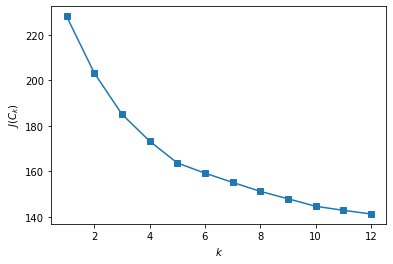

In [210]:
plt.plot(range(1, 13), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

კარგი k-ს დასადგენად ელბოუს მეთოდი შეიძლება გამოვიყენოთ, მაგრამ ჩვენი გრაფი არ არის იმდენად კარგი, რადგან მკვეთრი გარდამტეხი წერტილი არ აქვს, რის მერეც მხოლოდ ცოტათი მცირდება, თუმცა მაინც შეიძლება ავარჩიოთ k = 5. თან, ბევრი კლასტერი თვითონ ბიზნესისთვისაც რთული სამართავია.

In [211]:
kmeans = KMeans(n_clusters=5, random_state=1, n_init = 15, verbose=0).fit(kmeansData)
cost = np.sqrt(kmeans.inertia_)
cost

163.6442608476219

კლასტერების რაოდენობა ავარჩიეთ. ახლა შევეცადოთ, რომ დავადგინოთ კლასტერების შინაარსი, რატომ გამოყო ასე ალგორითმმა

## მიღებული კლასტერების ანალიზი

In [212]:
clusters = pd.DataFrame(kmeans.labels_, columns=['Clusters'])
initData.insert(9, 'Clusters', clusters, True)
initData

Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0       Male           No   22        No     Healthcare              1.0   
1     Female          Yes   38       Yes       Engineer              NaN   
2     Female          Yes   67       Yes       Engineer              1.0   
3       Male          Yes   67       Yes         Lawyer              0.0   
4     Female          Yes   40       Yes  Entertainment              NaN   
...      ...          ...  ...       ...            ...              ...   
2622    Male           No   29        No     Healthcare              9.0   
2623  Female           No   35       Yes         Doctor              1.0   
2624  Female           No   53       Yes  Entertainment              NaN   
2625    Male          Yes   47       Yes      Executive              1.0   
2626  Female           No   43       Yes     Healthcare              9.0   

     Spending_Score  Family_Size  Var_1  Clusters  
0               Low          4.0  Cat_4         4  
1           Average          3.0  Cat_4         2  
2               Low          1.0  Cat_6         3  
3              High          2.0  Cat_6         3  
4              High          6.0  Cat_6         2  
...             ...          ...    ...       ...  
2622            Low          4.0  Cat_6         1  
2623            Low          1.0  Cat_6         0  
2624            Low          2.0  Cat_6         2  
2625           High          5.0  Cat_4         0  
2626            Low          3.0  Cat_7         3  

[10695 rows x 10 columns]

In [213]:
def analyzeCluster(k):
    clust = initData[initData['Clusters'] == k]
    print(clust.describe())
    visualize(clust)

### კლასტერი 0:
ამ კლასტერში გვყავს საშუალოდ 38 წლის ადამიანები, შედარებით ნაკლები spending score-ით და დიდი სამუშაო გამოცდილებით.

               Age  Work_Experience  Family_Size  Clusters
count  1993.000000      1844.000000  1905.000000    1993.0
mean     38.726543         7.116052     2.408399       0.0
std      12.370737         3.469358     1.298485       0.0
min      18.000000         0.000000     1.000000       0.0
25%      30.000000         6.000000     1.000000       0.0
50%      37.000000         8.000000     2.000000       0.0
75%      43.000000         9.000000     3.000000       0.0
max      89.000000        14.000000     9.000000       0.0


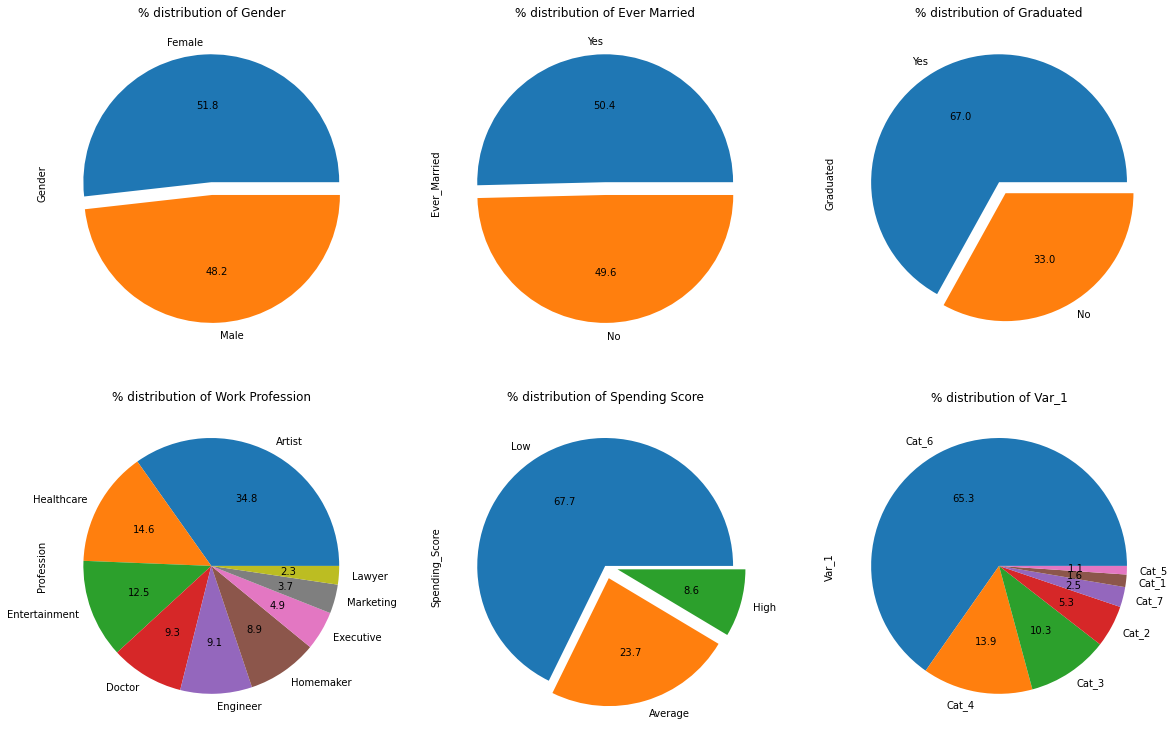

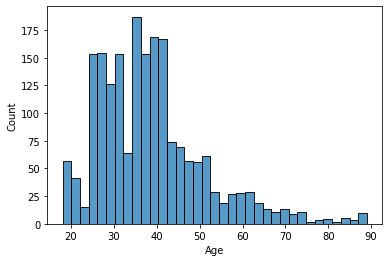

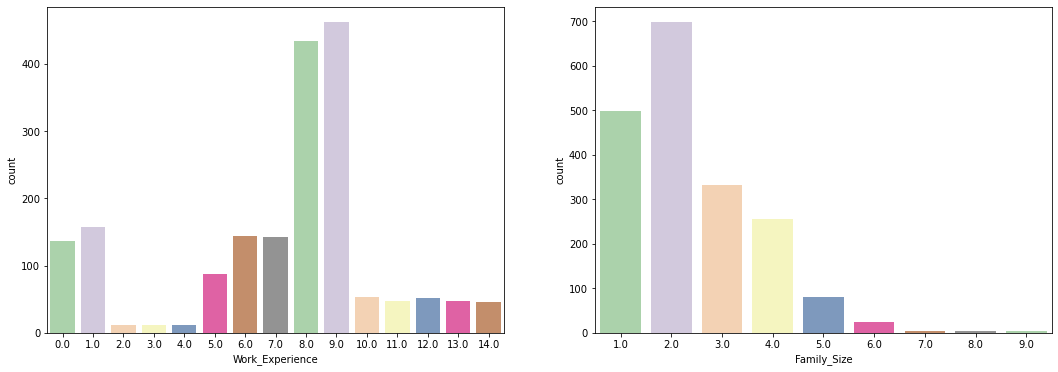

In [214]:
analyzeCluster(0)

### კლასტერი 1:

ამ კლასტერში საშუალოდ 41 წლის ადამიანები არიან, უმეტესად დამთავრბული აქვთ უნივერსიტეტი, უმეტესად დაბალი spending score, 0-1 წლიანი სამუშაო გამოცდილებით

               Age  Work_Experience  Family_Size  Clusters
count  2765.000000      2503.000000  2656.000000    2765.0
mean     41.822061         1.350779     2.013554       1.0
std      11.638682         2.079939     1.073480       0.0
min      18.000000         0.000000     1.000000       1.0
25%      33.000000         0.000000     1.000000       1.0
50%      41.000000         1.000000     2.000000       1.0
75%      49.000000         1.000000     2.000000       1.0
max      89.000000        14.000000     9.000000       1.0


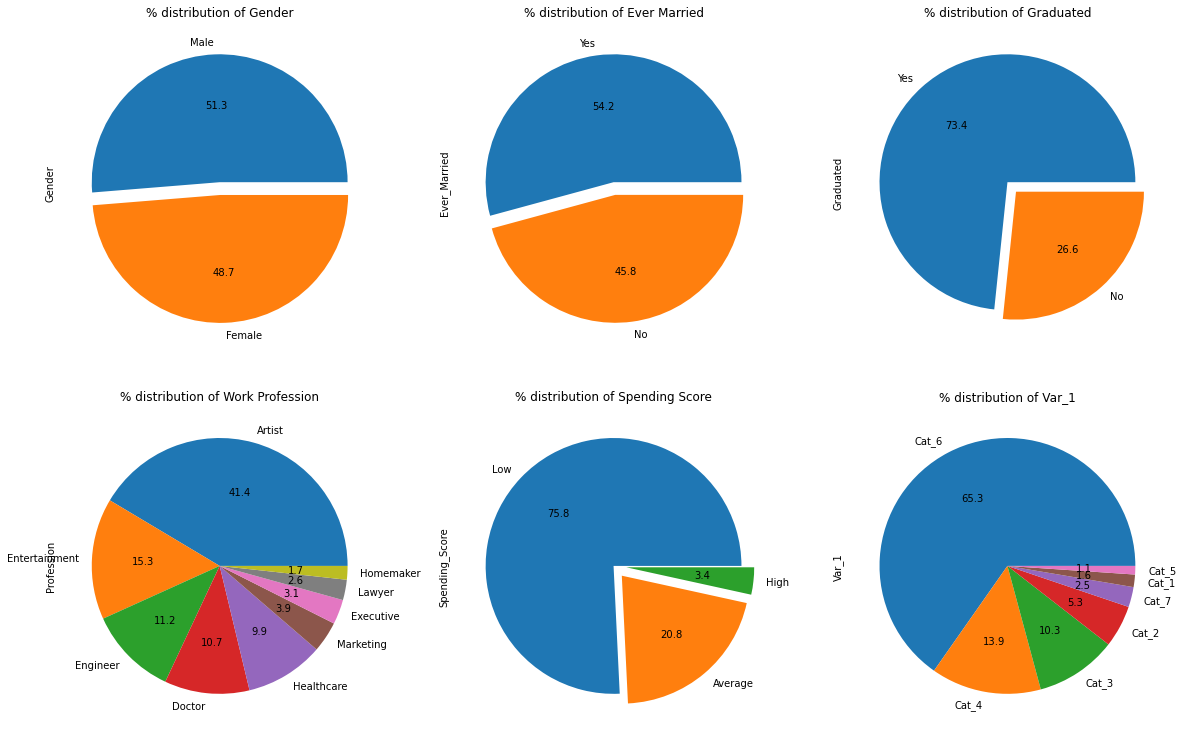

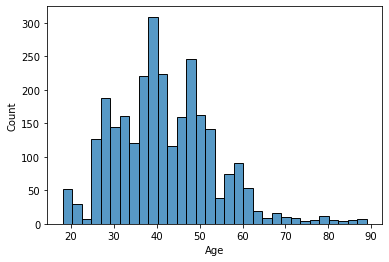

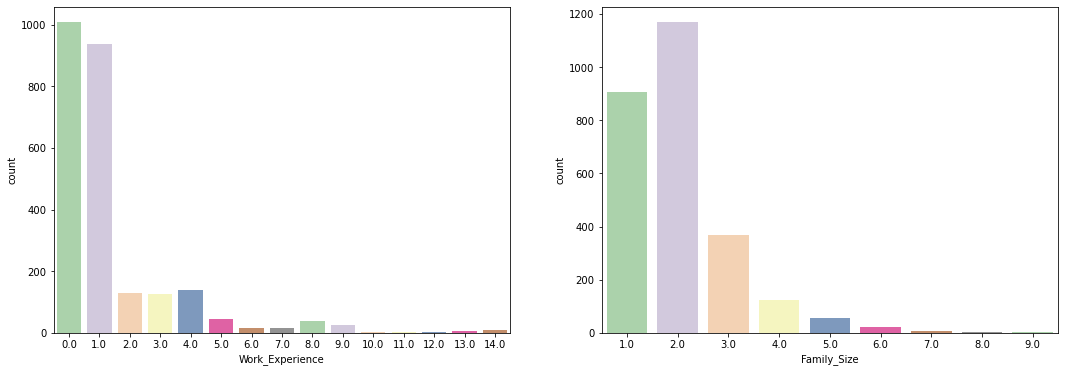

In [215]:
analyzeCluster(1)

### კლასტერი 2:

დაოჯახებული, მრავალშვილიანი ადამიანების კლასტერი.
ჰყავთ საშუალოდ 3.7 სულიანი ოჯახი, ასაკი საშუალოდ 46.3, spending score: 30% მაღალი და 50% საშუალო, უფრო მეტად კაცები

               Age  Work_Experience  Family_Size  Clusters
count  2093.000000      1841.000000  2024.000000    2093.0
mean     46.361204         1.751765     3.717885       2.0
std      12.202500         2.475923     1.379160       0.0
min      18.000000         0.000000     1.000000       2.0
25%      38.000000         0.000000     3.000000       2.0
50%      47.000000         1.000000     4.000000       2.0
75%      53.000000         2.000000     4.000000       2.0
max      89.000000        14.000000     9.000000       2.0


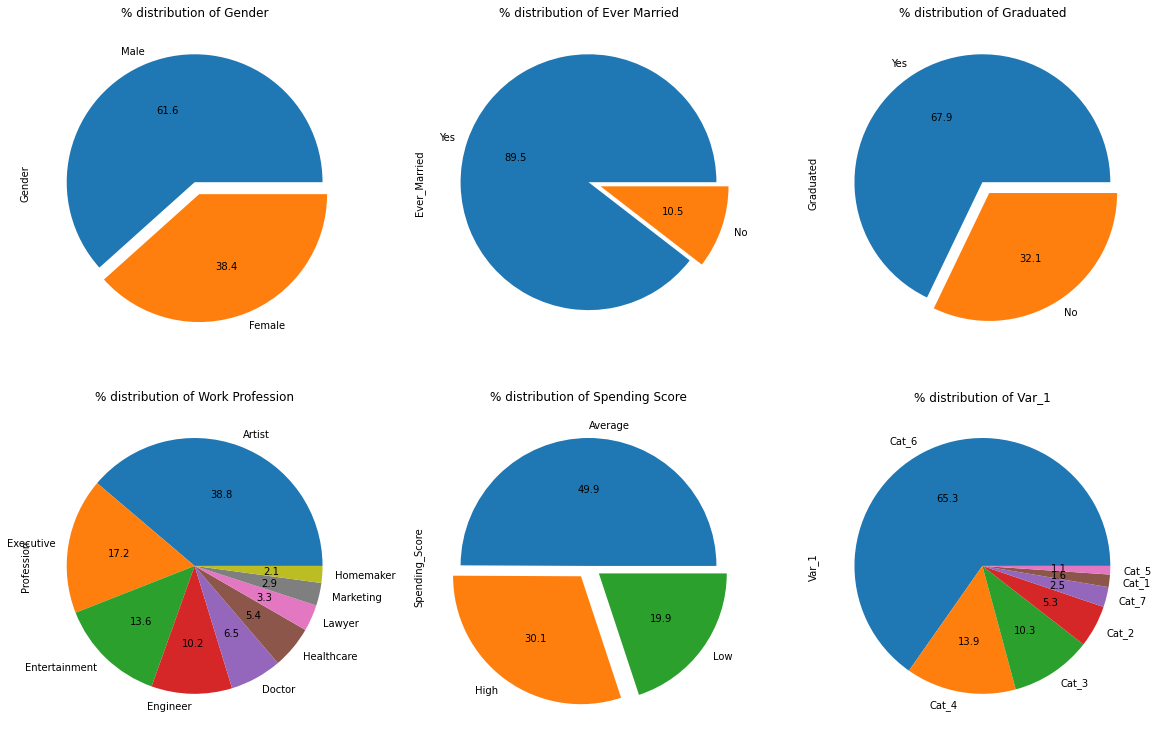

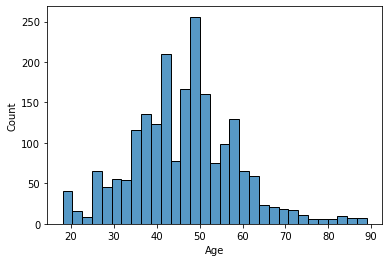

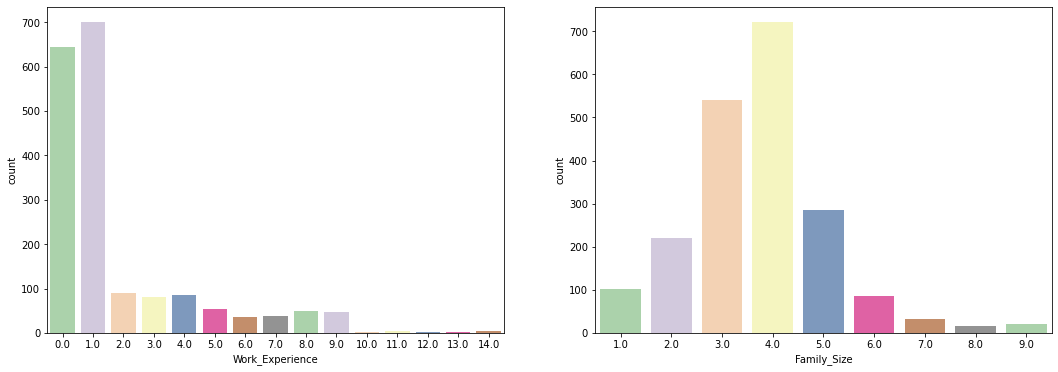

In [216]:
analyzeCluster(2)

### კლასტერი 3:

ხანდაზმულ მოსამართლეთა კლასტერი

40% მოსამართლეა, დაოჯახებულები იყვნენ/არიან 87%, spending score: 40% - მაღალი, 40%- დაბალი (მაინც უფრო საშუალო და მაღალშემოსავლიანების კლასტერი გამოდის, რადგან საწყის განაწილებაში მხოლოდ 24% იყო მაღალშემოსავლიანი)

დაოჯახებულობა აქაც მაღალია, მაგრამ აქ საშუალო ასაკი ბევრად მეტია მე-2 კლასტერზე, ასევე ოჯახსი წევრების რაოდენობაც უფრო ნაკლებია

               Age  Work_Experience  Family_Size  Clusters
count  1668.000000      1476.000000  1590.000000    1668.0
mean     65.166067         1.378049     2.132075       3.0
std      16.682306         2.247266     0.996616       0.0
min      18.000000         0.000000     1.000000       3.0
25%      58.000000         0.000000     2.000000       3.0
50%      68.000000         1.000000     2.000000       3.0
75%      77.000000         1.000000     2.000000       3.0
max      89.000000        14.000000     9.000000       3.0


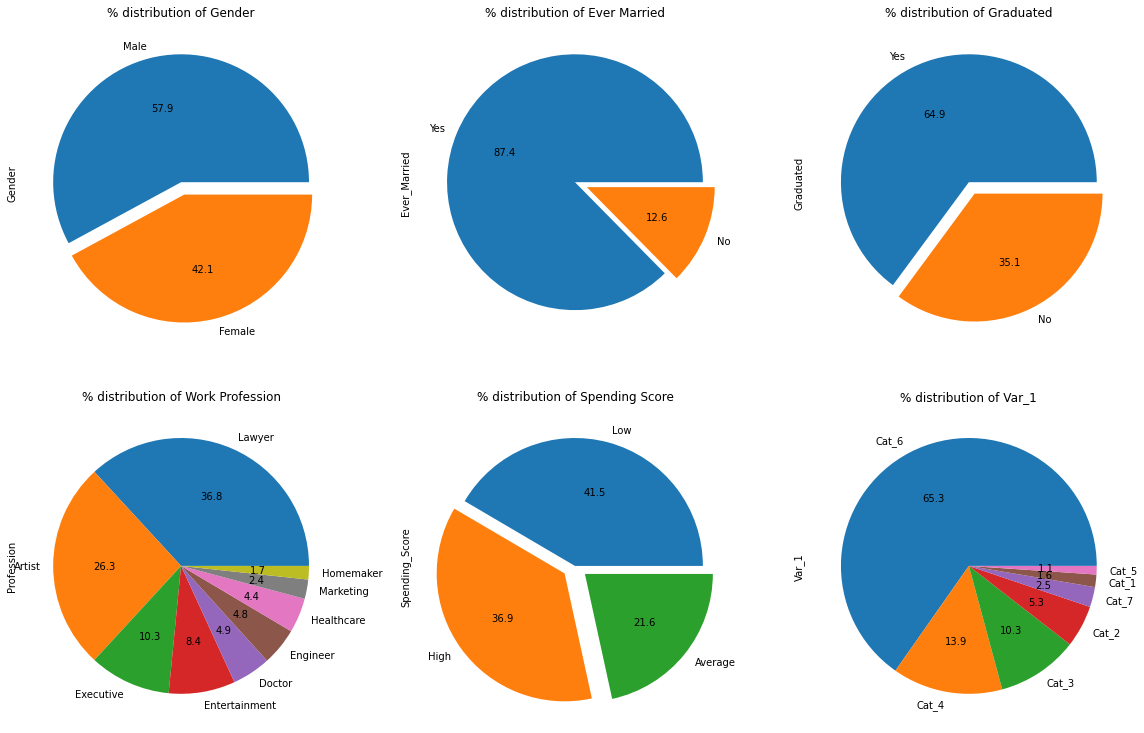

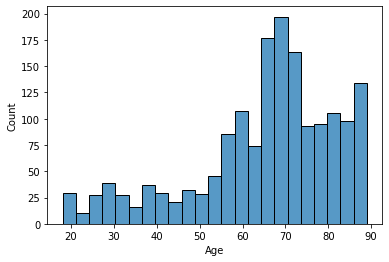

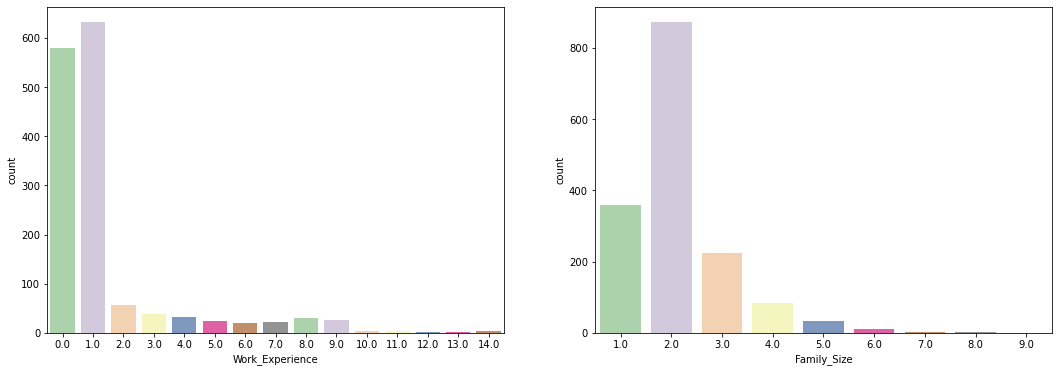

In [217]:
analyzeCluster(3)

### კლასტერი 4:

ახალგაზრდების კლასტერი, საშუალო ასაკი: 30 წელი, spending score: დაბალი 90%-ს, 47% ჯანდაცვის სისტემაში მუშაობს, 80% დაუოჯახებელი.

ოჯახის სიდიდე საკმაოდ დიდია: საშუალოდ 4 კაცი, როცა 80% დაუოჯახებელია, რაც მათემატიკურად შეუძლებელია თუ ოჯახში დედ-მამა და და-ძმა არ ითვლება. ამიტომ მგონია, რომ დაუოჯახებელი ადამიანების ოჯახში დედ-მამა და და-ძმა ითვლება. საინტერესოა, რომ ალგორითმმა ცალკე გამოყო ეს კლასტერები ერთმანეთისაგან: დედ-მამიანი ოჯახები და ცოლ-შვილიანი ოჯახები

ასევე, ყველა კლასტერზე დაკვირვებით, Var_1 ცვლადი ყველგან თანაბრადაა განაწილებული, შესამისად მგონია, რომ კომპანიამ შემთხვევითად მიანიჭა ადამინების რაღაც კატეგორიები და მაგას ნიშნავს ეს ცვლადი

               Age  Work_Experience  Family_Size  Clusters
count  2176.000000      1933.000000  2072.000000    2176.0
mean     30.702206         1.748577     4.001931       4.0
std      12.587223         2.508145     1.579686       0.0
min      18.000000         0.000000     1.000000       4.0
25%      22.000000         0.000000     3.000000       4.0
50%      28.000000         1.000000     4.000000       4.0
75%      33.000000         2.000000     5.000000       4.0
max      89.000000        14.000000     9.000000       4.0


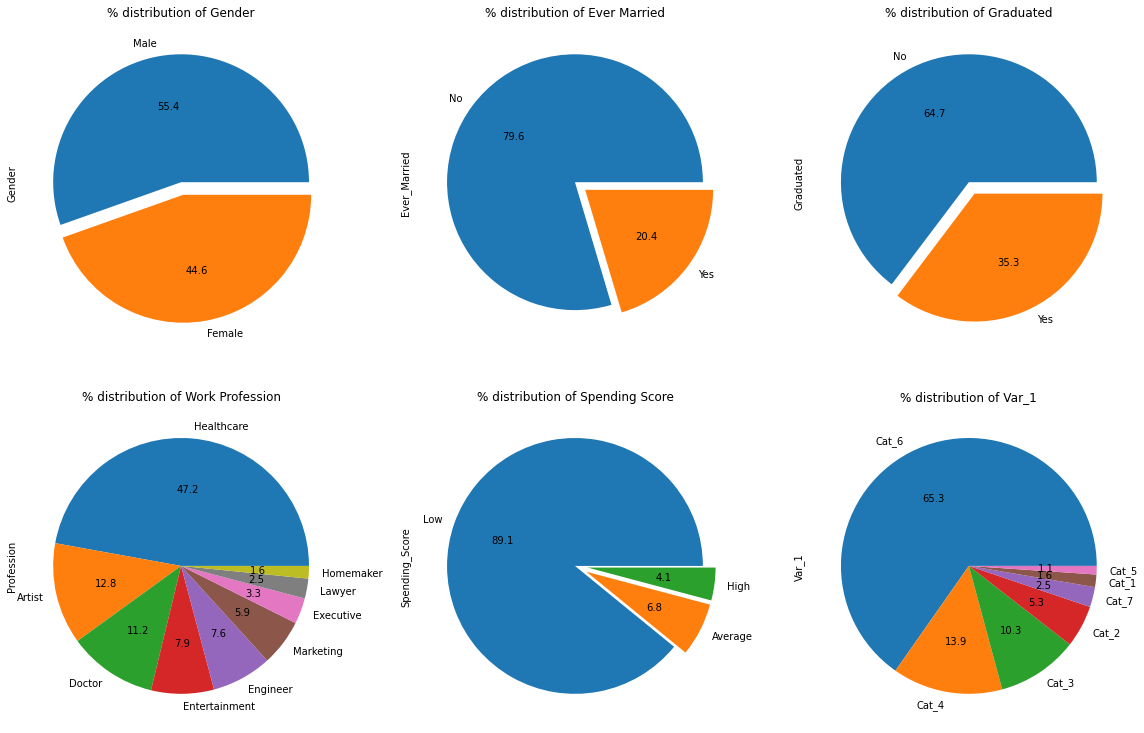

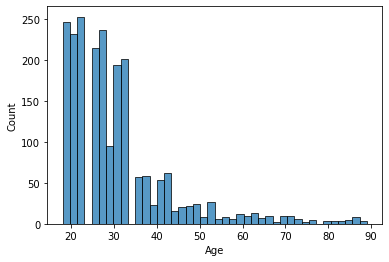

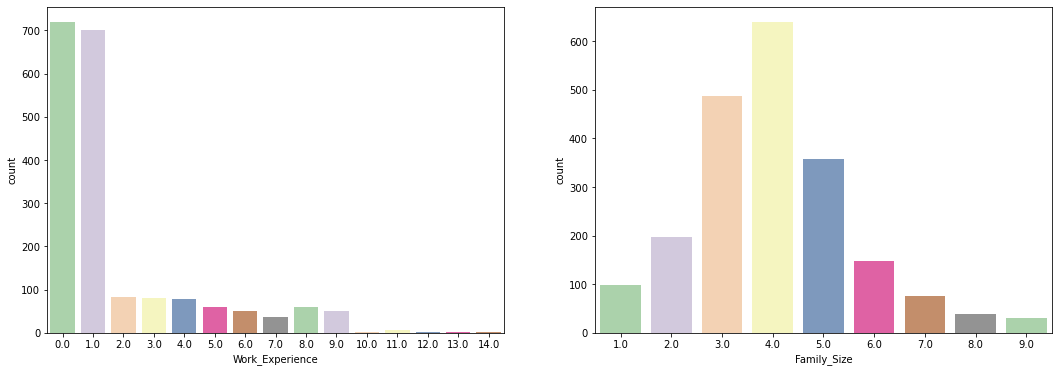

In [218]:
analyzeCluster(4)

ცალ-ცალკე განვიხილეთ და დავახასიათეთ ჩვენი 5 კლასტერი, ახლა შევეცდები მათი ვიზუალიზაცია გავაკეთო ერთ გრაფზე, რომ დავინახოთ რამდენად გაბნეულია და როგორ მიმართებაში არიან ერთმანეთთან სხვადასხვა კლასტერები. ამას  PCA ალგორითმის გამოყენებით გავაეკეთებ.

---

## PCA

პარამეტრები:
1. n_components: რამდენი ცვლადის დატოვება გვინდა. PCA SVD დეკომპოზიციის შემდეგ აიღებს მატრიცის პირველ n_components აიგენვექტორს, დატას ამ აიგენვექტორებზე პროეცირების შემდეგ შენარჩუნდება მაქსიმალური ვარიაცია, ანუ დაიკარგება მინიმალური ინფორმაცია საწყისი განზომილებიდან.

ჩვენ ავიღოთ n_components = 3, რადგან ვიზუალიზაციისთვის ვიყენებთ ამ ალგორითმს

In [219]:
pcaData = data.copy()
cols_to_norm = ['Age', 'Work_Experience', 'Family_Size']
normalize(pcaData, cols_to_norm)

In [220]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
# print(pcaData.mean(), pcaData.std())
#pcaData = (pcaData - pcaData.mean(axis=0)) / pcaData.std(axis=0)
pca.fit(pcaData)
pcaD = pca.transform(pcaData)
pcaD = pd.DataFrame(pcaD)
pcaD
# print("WWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWWW")
# print(pcaData.mean(), pcaData.std())

0         1
0      1.762150  0.859195
1      0.194874  0.049245
2     -1.673787 -0.534630
3     -2.202163  0.579821
4      0.348507  1.748787
...         ...       ...
10690  1.958043 -0.955759
10691 -0.024411 -0.726162
10692 -0.322734 -0.832265
10693 -0.188218  1.755528
10694  1.071957 -1.416903

[10695 rows x 2 columns]

In [221]:
def graphPCAbySize(column, divisor, table):
    fig, ax = plt.subplots(figsize = (15,10))

    scatter = ax.scatter(pcaD[0], pcaD[1], alpha=1, label=initData['Clusters'], c = initData['Clusters'], s=(table[column]+1)/divisor)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    legend = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="Clusters")
    ax.add_artist(legend)
    ax.grid(True)

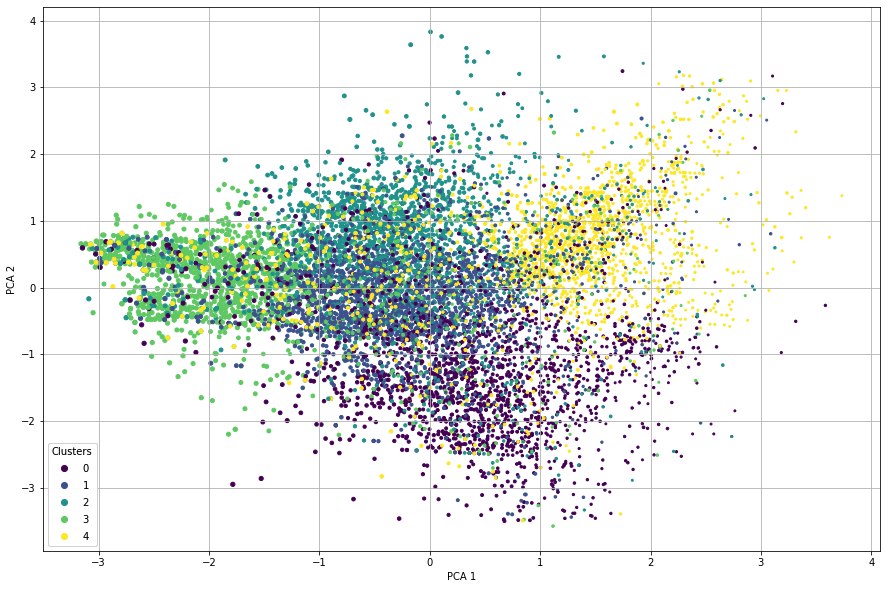

In [222]:
graphPCAbySize('Age', 5, initData)

წერტილები ასაკის მიხედვით დავალაგე ზომაში, ანუ რაც უფრო დიდია წერტილი, მით უფრო ასაკიანია ადამიანი. როგროც ვხედავთ, მარცხნიდან მარჯვნივ წერტილები იკლებს ზომაში, კლასტერებიც ასეა დალაგებული:
1. ღია მწვანე - ასაკიანი მოსამართლეების (მე-3) კლასტერია, 
2. - მუქი მწვანე -  დაოჯახებული მრავალშვილიანების კლასტერი (მე-2),
   - ლურჯი - უნი დამთავრებული, დაბალი spending score, პატარა ოჯახი (1-ლი)
   - იასამნისფერი - დიდი სამუშაო გამოცდილებით და დაბალი spending score (0-ლი)
3. ყვითელი - ახალგაზრდების კლასტერი (მე-4)

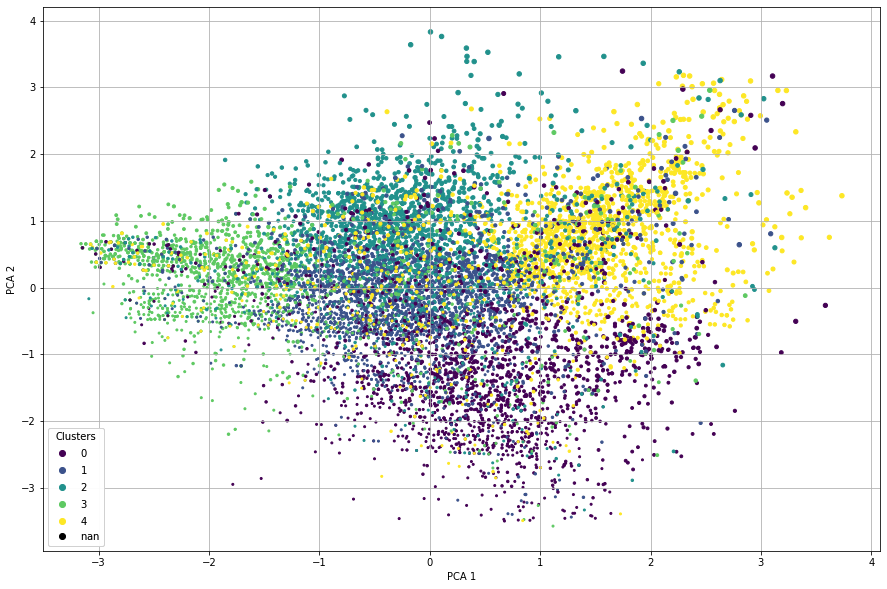

In [253]:
graphPCAbySize('Family_Size', 1/2, initData)

ოჯახების ზომის მიხედვით დალაგება y=x ღერძის გასწვრივ იზრდება: ზედა მარჯვენა კუთეში დიდ ოჯახიანები არიან, ქვედა მარცხენაში - პატარა
ოჯახის სიდიდის მიხედვით კლასტერების დალაგება:
1. ყვითელი (მე-4): ახალგაზრდების (ჯერ კიდევ მშობლებთან ცხოვრობენ)
2. მუქი მწვანე (მე-2): დაოჯახებული მრავალშვილიანები (ბევრი შვილი ჰყავთ)
3. - იასამნისფერი (0-ლი): დიდი სამუშაო გამოცდილება, დაბალი spending score, 
   - ლურჯი (1-ლი): უნი დამთავრებული
   - ღია მწვანე (მე-3): ასაკიანი მოსამართლეები, რომელთა დიდი ნაწილი დაოჯახებულია, ამიტომ უმეტესობის ოჯახი 2 კაციანია (თვითონ და მეუღლე)

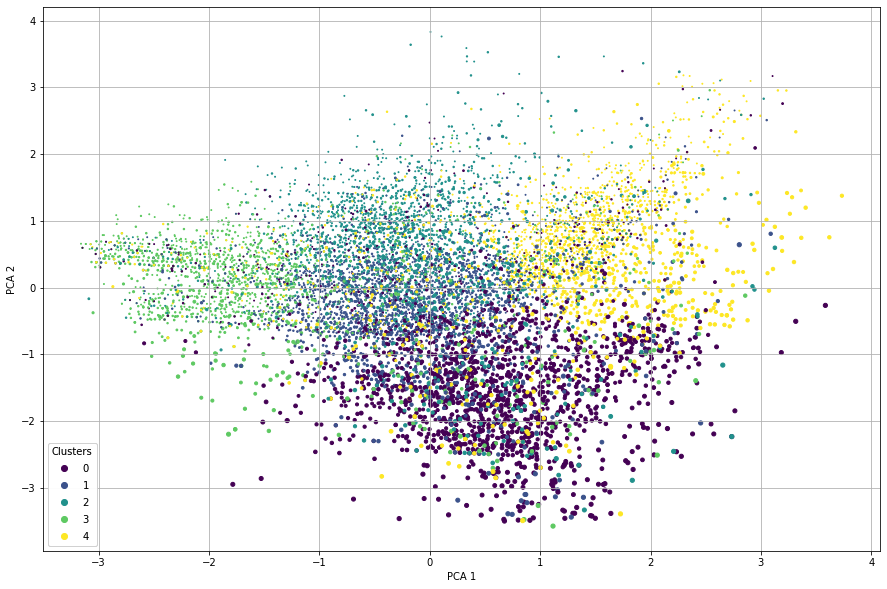

In [258]:
graphPCAbySize('Work_Experience', 1/4, data)

### y ღერძი

როგორც ვხედავთ, წერტილიების ზომა ზემოდან ქვემოთ იზრდება, ამგვარად, სავარაუდოდ იგრეკ ღერძ PCA-მ სამუშაო გამოცდილების მიხედვით აიღო

### x ღერძი

იქს ღერძი კი ასაკის მიხედვით (პირველ scatter plot-ში ჩანს)

რადგან ორივე ღერძი არაკატეგორიული ცვლადების მიხედვით აიღო, ვფიქრობ, რომ pca-ს ალგორითმიდან გამომდინარე კატეგოირულ ცვლადებს იმდენად დიდი მნიშვნელობა არ მიანიჭა რამდენადაც არაკატეგორიულებს. 


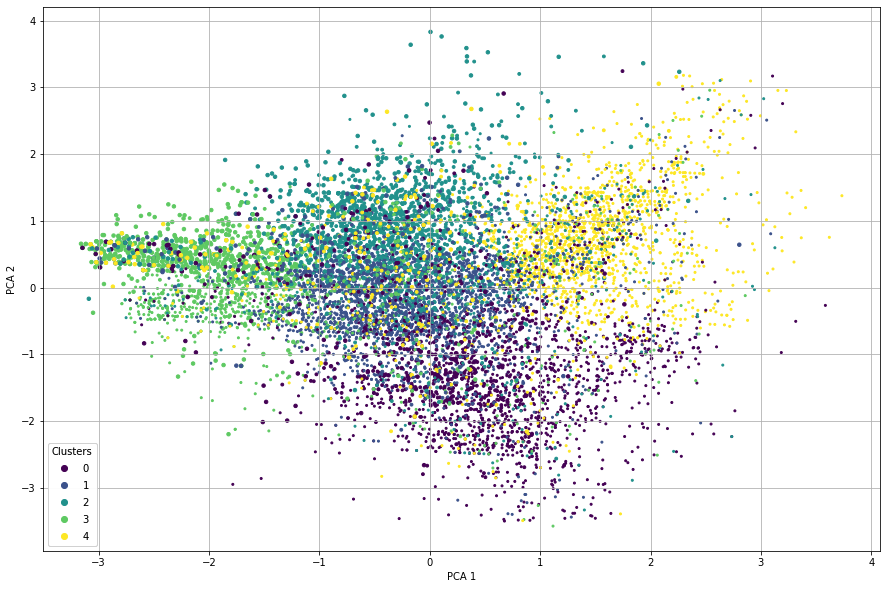

In [224]:
graphPCAbySize('Spending_Score', 1/4, data)

spending score-ის მიხედვით ყველაზე დიდი კლასტერი მწვანეა (მე-3)

გავაანალიზოთ კლასტერების ურთიერთმიმართება: 

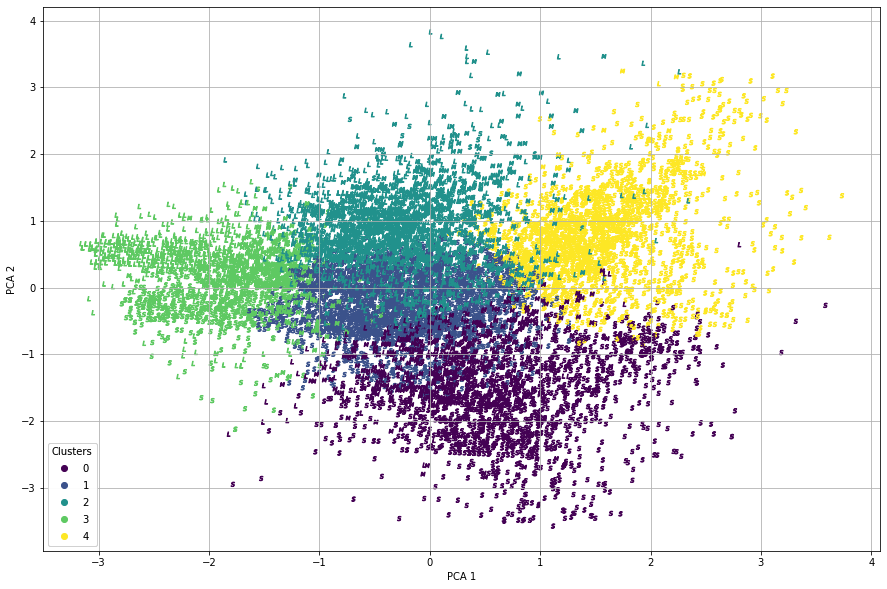

In [251]:
fig, ax = plt.subplots(figsize = (15,10))

markerData = data.copy()
markerData.insert(23, 'Clusters', clusters, True)

pcaDspending0 = pcaD[data["Spending_Score"] == 0]
pcaDspending1 = pcaD[data["Spending_Score"] == 1]
pcaDspending2 = pcaD[data["Spending_Score"] == 2]

initDataSpending0 = markerData[markerData["Spending_Score"] == 0]
initDataSpending1 = markerData[markerData["Spending_Score"] == 1]
initDataSpending2 = markerData[markerData["Spending_Score"] == 2]

ax.scatter(pcaDspending0[0], pcaDspending0[1], alpha=1, label=initDataSpending0['Clusters'], c = initDataSpending0['Clusters'], marker="$S$", s=20)
ax.scatter(pcaDspending1[0], pcaDspending1[1], alpha=1, label=initDataSpending1['Clusters'], c = initDataSpending1['Clusters'], marker="$M$", s=20)
ax.scatter(pcaDspending2[0], pcaDspending2[1], alpha=1, label=initDataSpending2['Clusters'], c = initDataSpending2['Clusters'], marker="$L$", s=20)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
legend = ax.legend(*scatter.legend_elements(), loc="lower left", title="Clusters")
ax.add_artist(legend)
ax.grid(True)
plt.show()

### კლასტერების ურთიერთმიმართების ანალიზი:

ლურჯი კლასტერი ყველა კლასტერის შუაში იმყოფება და ზემოდან ედება სხვადასხვა კლასტერის წარმომადგენლები. მართლაც, რომ დავუკვირდეთ ლურჯ კლასტერშ მოხვედრილ ადამიანებს, ისინი ყველაზე მეტად ჰგვანან სხვა კლასტერების წარმომადგენლებს:

- დაოჯახებულობით: იასამნისფერ კლასტერს
- უნის დამთავრებით: __გამოირჩევიან__ 74%-ს (ყველაზე მეტს) დამთავრებული აქვს, თუმცა ამითაც ჰგავს იასამნისფერს (იქ 67%-ს აქვს დამთავრებული)
- სამუშაო გამოცდილებით: ჰგავს მუქ მწვანეს, ღია მწვანეს და ყვითელს (1,35 წელი) 
- ასაკით: ჰგავს იასამნისფერს და მუქ მწვანეს (საშუალო ასაკიანი კლასტერებია ესენი) (41 წელი)
- spending: ჰგავს იასამნისფერს და ყვითელს (დაბალ ხარჯიანი კლასტერებია) (76% დაბალი ხარჯი, 20% - საშუალო)
- ოჯახსის ზომა: ჰგავს იასამნისფერს და ღია მწვანეს (პატარა ოჯახიანი კლასტერები) (2 კაცი)
- პროფესია: 40% ხელოვანია, როგორც იასამნისფერ და მუქ მწვანე კლასტერებში


ღია მწვანე კლასტერი და ყვითელი კლასტერი საკმაოდ შორს არიან ერთმანეთისგან:
- ღია მწვანე: ასაკით დიდი, მოსამართლეები, მცირე ოჯახი, დაოჯახებულები, საშუალო და მაღალი ხარჯით
- ყვითელი: ასაკით პატარა, ჯანდაცვის სფეროში, დიდი ოჯახი, დასაოჯახებლები, დაბალი ხარჯი

მსგავსება:
<br>
დაბალი სამუშაო გამოცდილება, უნი აქვს დამთავრებული 65%-ს, კაცი - 56%




### PCA 3 განზომილებაში

In [255]:
pcaData2 = data.copy()
cols_to_norm = ['Age', 'Work_Experience', 'Family_Size']
normalize(pcaData2, cols_to_norm)

In [256]:
from sklearn import decomposition

pca2 = decomposition.PCA(n_components=3)

pca2.fit(pcaData2)
pcaD2 = pca2.transform(pcaData2)
pcaD2 = pd.DataFrame(pcaD2)
pcaD2

0         1         2
0      1.762150  0.859195 -0.679269
1      0.194874  0.049244  0.443496
2     -1.673787 -0.534630 -0.763868
3     -2.202163  0.579821  0.366929
4      0.348507  1.748787  1.595911
...         ...       ...       ...
10690  1.958043 -0.955759  0.985368
10691 -0.024411 -0.726162 -1.438374
10692 -0.322734 -0.832265 -0.303994
10693 -0.188218  1.755528  1.320895
10694  1.071957 -1.416903  0.836659

[10695 rows x 3 columns]

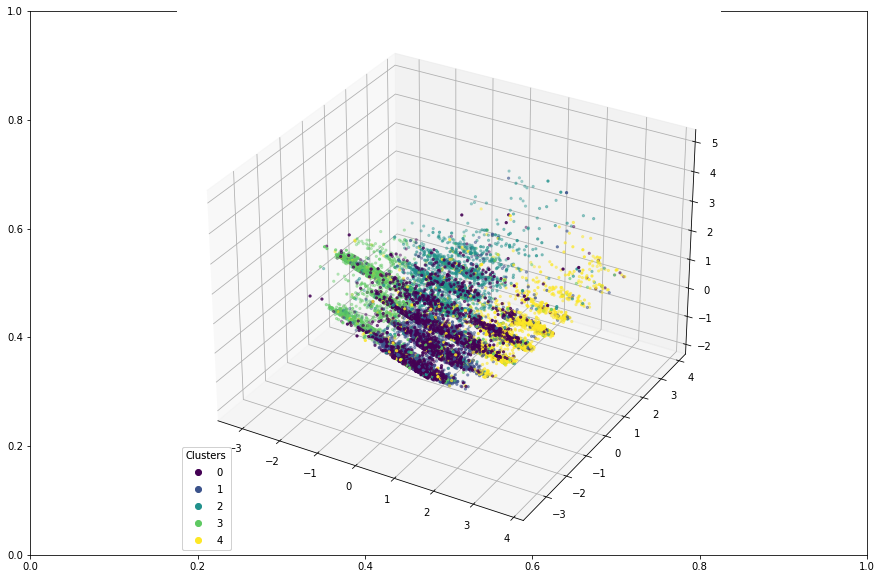

In [257]:
# %matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
fig, ax = plt.subplots(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pcaD2[0], pcaD2[1], pcaD2[2], label=initData['Clusters'], c = initData['Clusters'], s=5)
legend = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="Clusters")
ax.add_artist(legend)
plt.show()

ჩვენ მიერ აღებული კლასტერების შინაარსსა და ურთიერთმიმართებაზე უკვე შეგვექმნა გარკვეული წარმოდგენა, ახლა საინტერესოა თავად ცვლადები რა გავლენას ახდენენ ერთმანეთზე. 
<br>
ამიტომ, ცოტა ხნით დავივიწყოთ ჩვენი 5 კლასტერი და som-ის მეშვეობით გავაანალიზოთ ცვლადები და მათი დამოკიდებულება

---

## SOM

სომი კლასტერიზაციას აკეთებს, უბრალოდ თან ყურადღებას აქცევს კლასტერების ერთმანეთთან მდებარეობას, ანუ თუ მაგალითად ერთი კლასტერის ცენტროიდმა მნიშვნელოვნად გადაიწია ერთ მხარეს, მასთან ახლო კლასტერების ცენტროიდებიც შეიცვლიან მდებარეობას. ამის გამო, სომით ვიზუალიზაცია საკმაოდ კარგი გამოდის. 

In [372]:
%matplotlib inline
import math
import glob
#import urllib3
import random
import joblib
from sompy.sompy import SOMFactory
from sompy.visualization.plot_tools import plot_hex_map
import logging
import matplotlib


In [287]:
somData = data.copy()
clustering_vars = data.columns
somDataVals = data[clustering_vars].values
names = clustering_vars

In [288]:
data.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience',
       'Spending_Score', 'Family_Size', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Var_1_Cat_1',
       'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5',
       'Var_1_Cat_6', 'Var_1_Cat_7'],
      dtype='object')

__პარამეტრები:__
1. somDataVals: ყველა მონაცემი, რომელთა მიხედვითაც som ალგორითმი ახდენს კლასტერიზაციას
2. mapsize: სიგრძე და სიგანე მეპის. შემთხვევითად ირჩევა ყოველი მოდელისთვის ჩვენ მიერ განსაზღვრული შუალედიდან. რომ შემდეგ ვნახოთ რომელი განზომილებებისთვის იმუშავებს საუკეთესოდ
3. normalization: ნორმალიზაციის პარამეტრი
4. initialization: ინიციალიზაციის ტიპი (random/pca)
5. component_names: სახელები ცვლადების
6. lattice: კლასტერების ფორმა ვიზუალიზაციისას

რადგან ცოტა მონაცემი გვაქვს (10000) ბევრ კლასტერად დაყოფის შემთხვევაში უმრავლესობა ცარიელი კლასტერი იქმნება, რაც არაფერში გვადგება (თან რეპორტინგ ცვლადს ვეღარ დავხატავთ), ამიტომ შედარებით ცოტა კლასტერად დავაყოფინებ

In [314]:
%%time
for i in range(30):
    sm = SOMFactory().build(somDataVals, mapsize=[random.choice(list(range(3, 8))), 
                                           random.choice(list(range(2, 6)))],
                            normalization = 'var', initialization='random', component_names=names, lattice="hexa")
    sm.train(n_job=4, verbose=False, train_rough_len=30, train_finetune_len=100)
    joblib.dump(sm, "model_{}.joblib".format(i))

CPU times: user 2min 36s, sys: 1min 7s, total: 3min 43s
Wall time: 2min 34s


ჩვენი მოდელებიდან დავითვალოთ თითოეულის ერორები, რომ შემდეგ საუკეთესო ავარჩიოთ

In [315]:
models_pool = glob.glob("./model*")
errors=[]
i = 0
for model_filepath in models_pool:
    sm = joblib.load(model_filepath)
    topographic_error = sm.calculate_topographic_error()
    quantization_error = sm.calculate_quantization_error()
    errors.append((topographic_error, quantization_error))
    print(i, model_filepath, topographic_error, quantization_error)
    i += 1
e_top, e_q = zip(*errors)

0 ./model_28.joblib 0.05021037868162693 0.5511608035594995
1 ./model_24.joblib 0.013277232351566153 0.5718285070438907
2 ./model_12.joblib 0.023281907433380083 0.5122913530244078
3 ./model_6.joblib 0.059186535764375874 0.5397323850235939
4 ./model_26.joblib 0.027676484338475922 0.5226681058032986
5 ./model_4.joblib 0.08424497428705002 0.5390154789809221
6 ./model_8.joblib 0.10687237026647967 0.5532060442690214
7 ./model_10.joblib 0.05881252921926134 0.5279416777436069
8 ./model_14.joblib 0.04029920523609163 0.5702594255825222
9 ./model_18.joblib 0.026554464703132306 0.5134291366179567
10 ./model_0.joblib 0.037120149602618044 0.5130090834460681
11 ./model_22.joblib 0.030762038335670875 0.519223943876667
12 ./model_2.joblib 0.04086021505376344 0.5729645421518907
13 ./model_16.joblib 0.1442730247779336 0.5341871581363526
14 ./model_20.joblib 0.03412809724170173 0.501009637537207
15 ./model_13.joblib 0.04431977559607293 0.49296435023837626
16 ./model_7.joblib 0.07732585320243104 0.52314449

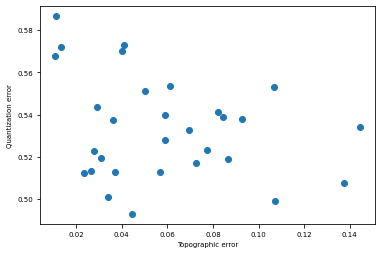

In [316]:
plt.scatter(e_top, e_q)
plt.xlabel("Topographic error")
plt.ylabel("Quantization error")
plt.show()

ავირჩიოთ მე-0 მოდელი, რადგან დაბალი აქვს როგორც ტოპოგრაფიული ასევე მეორე ერორი.

In [317]:
selected_model = 23
sm = joblib.load(models_pool[selected_model])

topographic_error = sm.calculate_topographic_error()
quantization_error = sm.calculate_quantization_error()
print ("Topographic error = %s\n Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.029266012155212715
 Quantization error = 0.5435819315155449


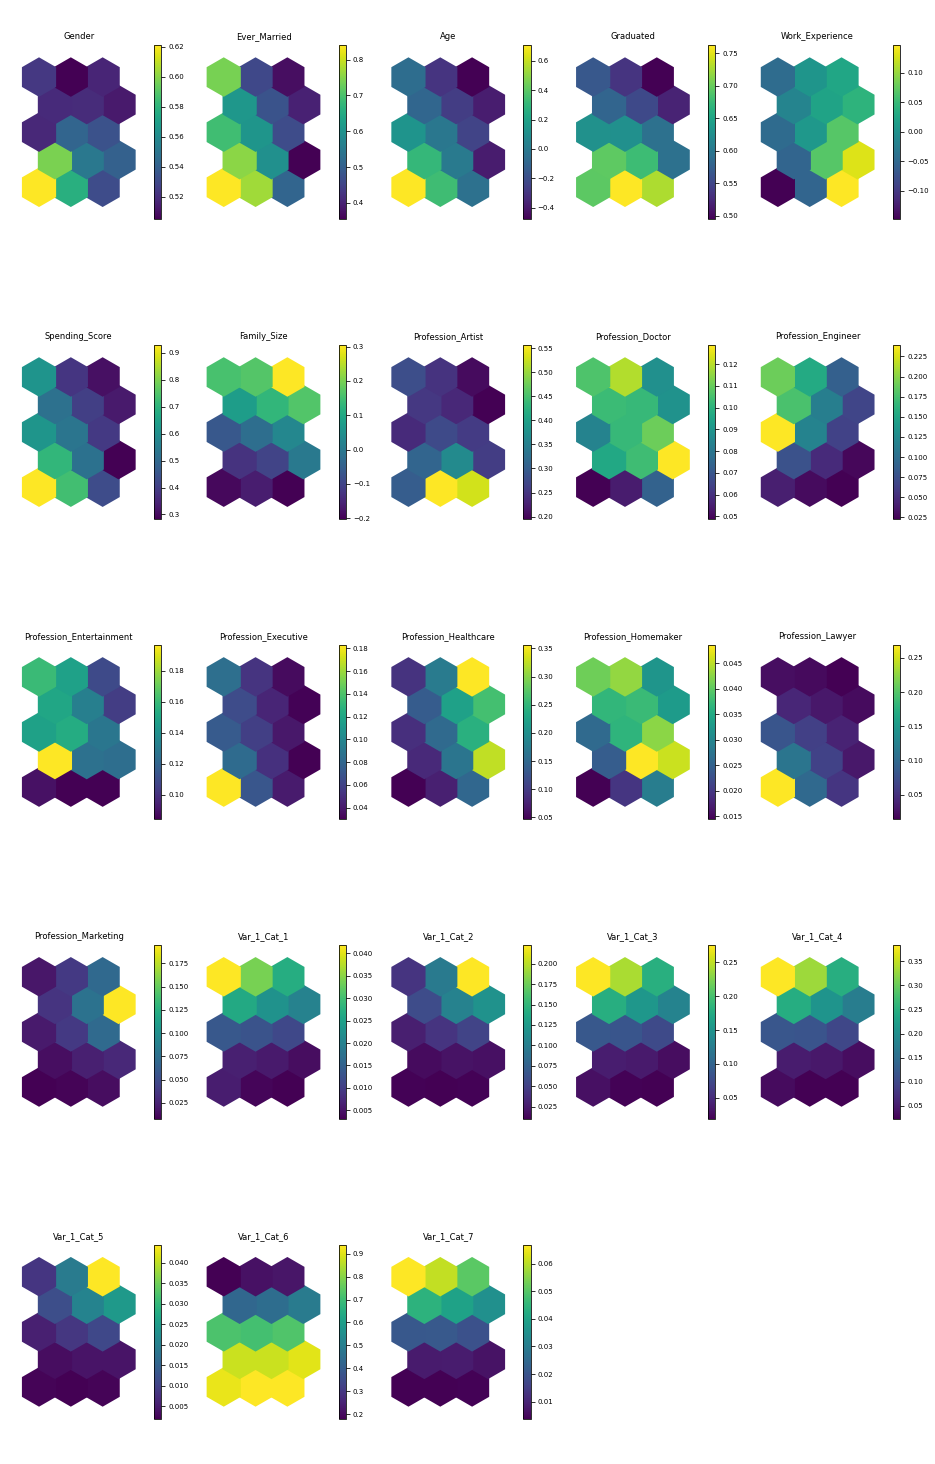

In [329]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(sm, col_sz=5, which_dim="all", denormalize=True)
plt.show()

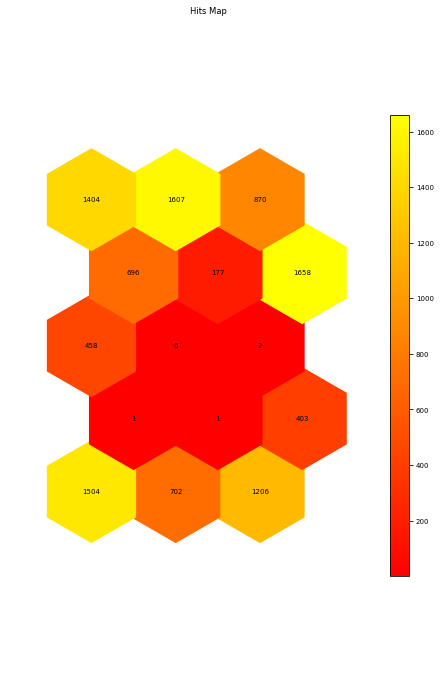

In [328]:
from sompy.visualization.bmuhits import BmuHitsView
sm.codebook.lattice="hexa"
vhts  = BmuHitsView(12,12,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)
plt.show()

### დასკვნები:

- ასაკისა და მოსამართლეობის გრაფებს თუ დავაკვირდებით, მივხვდებით, რომ ასაკით შემცირებასთან ერთად, მცირდება მოსამართლეების რაოდენობაც, ასევე მცირდება დაოჯახებულების რაოდენობაც და მცირდება spending score-იც
- ჩვენდა გასაოცრად სამუშაო გამოცდილება და ასაკი ერთმანეთთან კორელაციაში არ არიან

---

ახლა დავამატოთ reporting ცვლადი. ვფიქრობ, reporting-ად spending_score ავიღოთ, რადგან ლოგიკურად საინტერესოა, იმის გაგება, თუ რაზეა დამოკიდებული ადამიანის მხარჯველობითი დონე. ასევე, ბიზნესისთვისაც კარგი ინფორმაციაა

ასევე, საერთოდ ამოვიღებ var_cat_n ტიპის ცვლადებს, რადგან, როგორც k-means-ით გავიგე, შემთხვევითად მინიჭებული კატეგორიებია და ამ ალგორითმში ვიზუალიზაციის გადატვირთვის მეტს არაფერს იზამს

In [349]:
somData = data.copy()

clustering_vars = list(data.columns)
clustering_vars = clustering_vars[:16]
clustering_vars.remove("Spending_Score")
somDataVals = somData[clustering_vars].values
names = clustering_vars
names

['Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Work_Experience',
 'Family_Size',
 'Profession_Artist',
 'Profession_Doctor',
 'Profession_Engineer',
 'Profession_Entertainment',
 'Profession_Executive',
 'Profession_Healthcare',
 'Profession_Homemaker',
 'Profession_Lawyer',
 'Profession_Marketing']

In [350]:
%%time
for i in range(30):
    sm = SOMFactory().build(somDataVals, mapsize=[random.choice(list(range(3, 8))), 
                                           random.choice(list(range(2, 6)))],
                            normalization = 'var', initialization='random', component_names=names, lattice="hexa")
    sm.train(n_job=4, verbose=False, train_rough_len=30, train_finetune_len=100)
    joblib.dump(sm, "model_{}.joblib".format(i))

CPU times: user 2min 48s, sys: 1min 12s, total: 4min
Wall time: 2min 56s


In [352]:
models_pool = glob.glob("./model*")
errors=[]
i = 0
for model_filepath in models_pool:
    sm = joblib.load(model_filepath)
    topographic_error = sm.calculate_topographic_error()
    quantization_error = sm.calculate_quantization_error()
    errors.append((topographic_error, quantization_error))
    print(i, model_filepath, topographic_error, quantization_error)
    i += 1
e_top, e_q = zip(*errors)

0 ./model_28.joblib 0.07872837774661057 0.5710893798727107
1 ./model_24.joblib 0.014960261804581581 0.5391500715222631
2 ./model_12.joblib 0.06573165030388031 0.5752237382044858
3 ./model_6.joblib 0.043104254324450676 0.5148857188551811
4 ./model_26.joblib 0.014773258532024311 0.5165909032647322
5 ./model_4.joblib 0.15240766713417483 0.5582715271615625
6 ./model_8.joblib 0.15942028985507245 0.523045131845709
7 ./model_10.joblib 0.03300607760635811 0.5251477432560328
8 ./model_14.joblib 0.03506311360448808 0.49856533214676535
9 ./model_18.joblib 0.055352968676951844 0.5239516588803771
10 ./model_0.joblib 0.04057971014492753 0.5251707256623174
11 ./model_22.joblib 0.08480598410472183 0.4443576328182047
12 ./model_2.joblib 0.04329125759700795 0.5432965671112022
13 ./model_16.joblib 0.05619448340345956 0.5987763326806191
14 ./model_20.joblib 0.04207573632538569 0.540147244458223
15 ./model_13.joblib 0.13380084151472652 0.5327355394373418
16 ./model_7.joblib 0.07414679756895745 0.5878578729

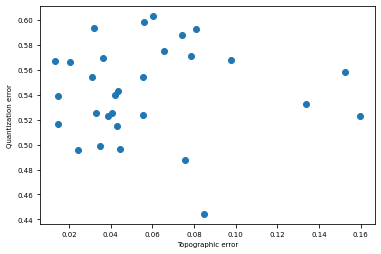

In [353]:
plt.scatter(e_top, e_q)
plt.xlabel("Topographic error")
plt.ylabel("Quantization error")
plt.show()

In [364]:
selected_model = 1
sm = joblib.load(models_pool[selected_model])

topographic_error = sm.calculate_topographic_error()
quantization_error = sm.calculate_quantization_error()
print ("Topographic error = %s\n Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.014960261804581581
 Quantization error = 0.5391500715222631


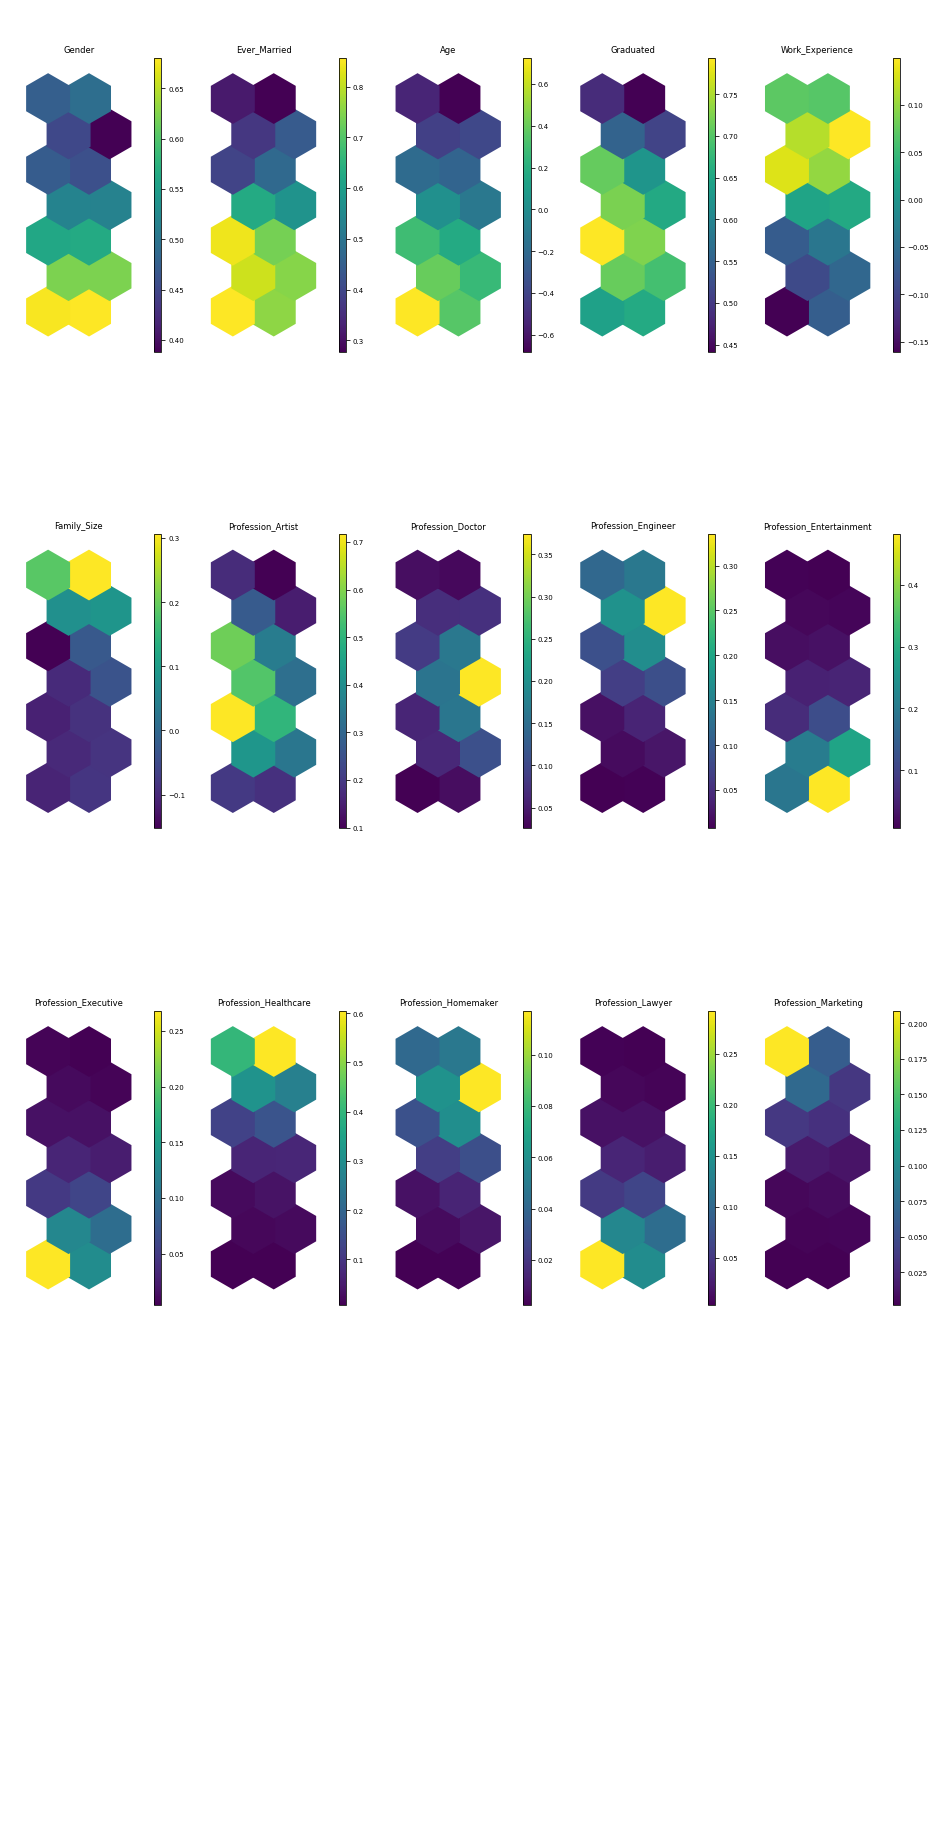

In [365]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(sm, col_sz=5, which_dim="all", denormalize=True)
plt.show()

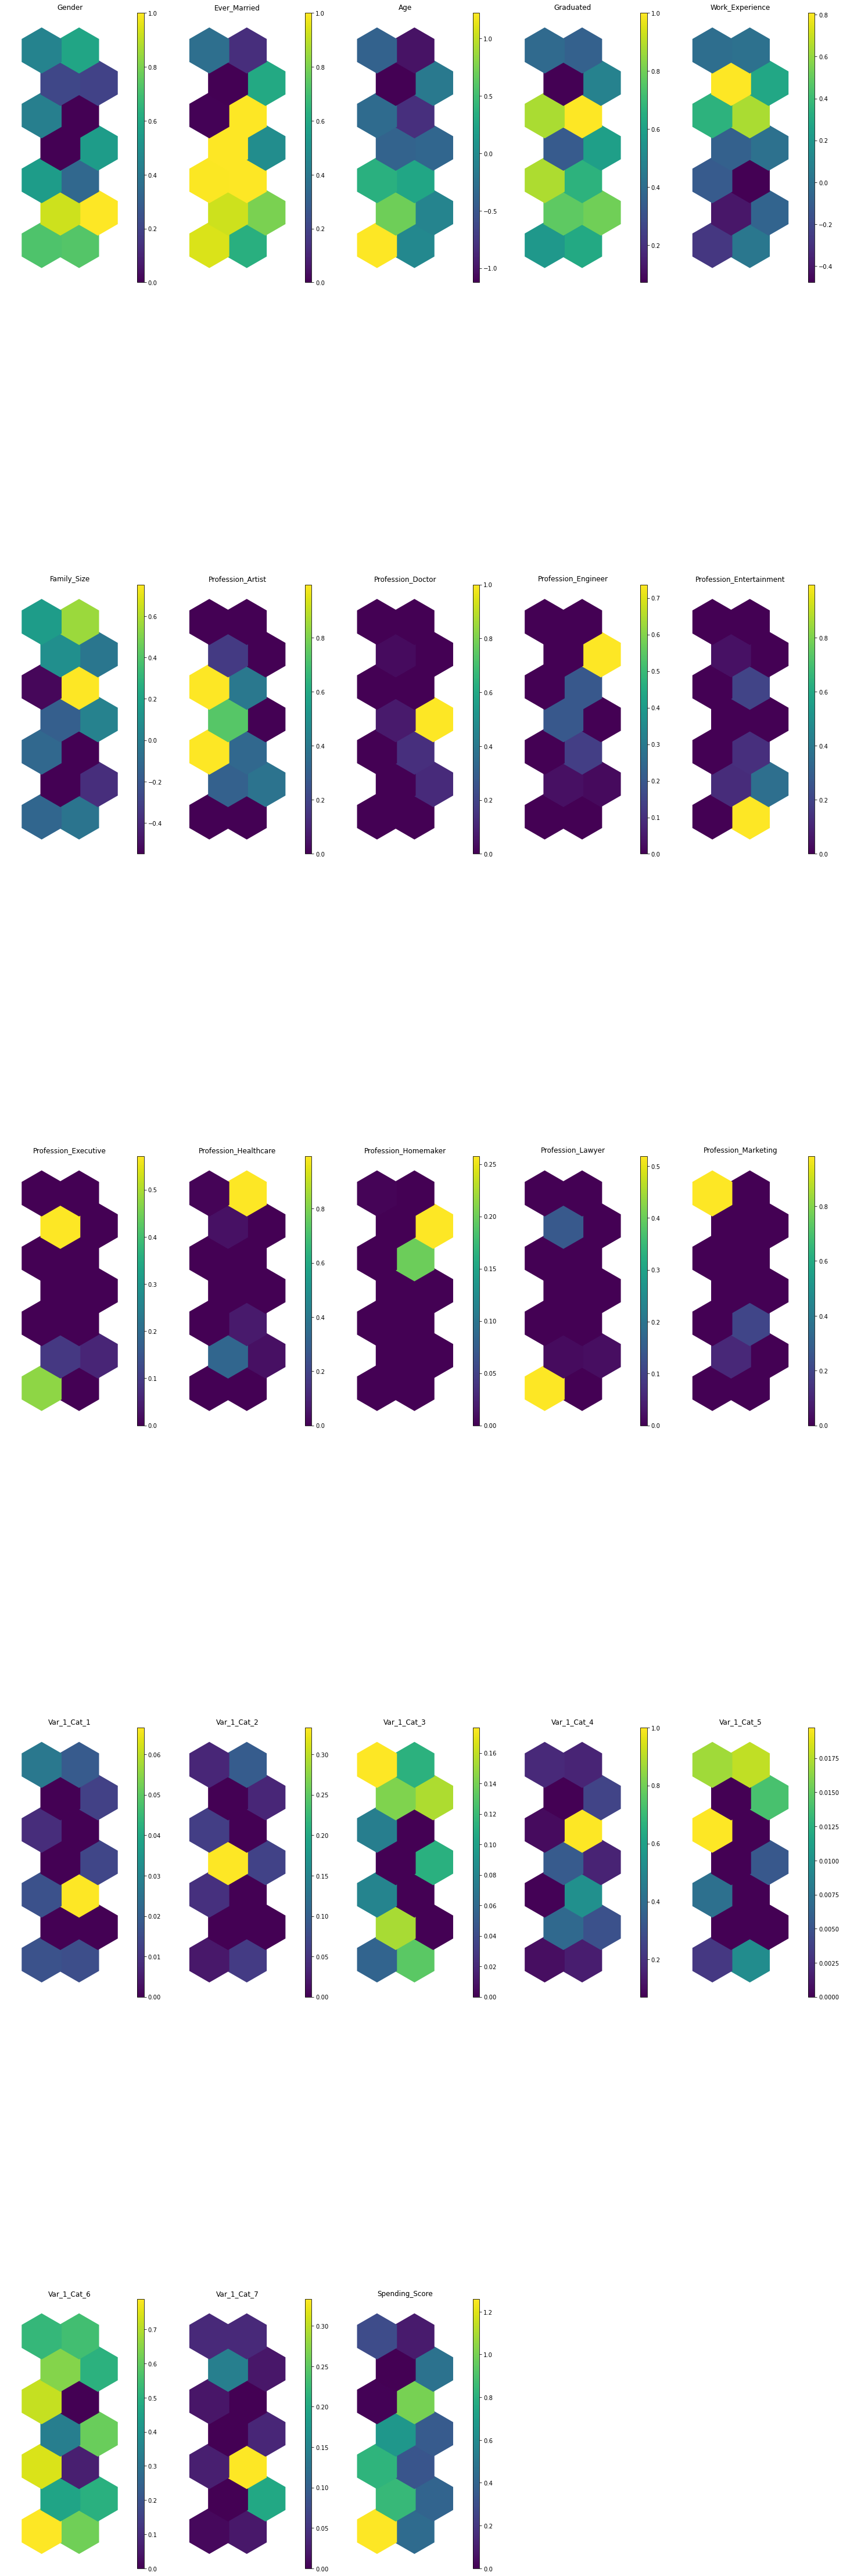

In [375]:
exogeneous_vars = [c for c in somData.columns if not c in clustering_vars+["Spending_Score", "bmus"]] 
somData["bmus"] = sm.project_data(somDataVals)
somData = somData[clustering_vars + exogeneous_vars + ["Spending_Score"] + ["bmus"]]

empirical_codebook=somData.groupby("bmus").mean().values
matplotlib.rcParams.update({'font.size': 10})
plot_hex_map(empirical_codebook.reshape(sm.codebook.mapsize + [empirical_codebook.shape[-1]]), 
             titles=somData.columns[:-1], shape=[5, 5], colormap=None)
plt.show()

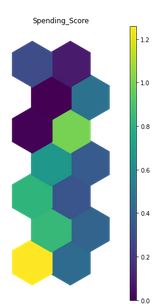 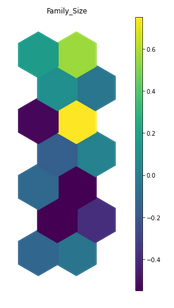
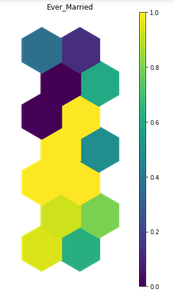

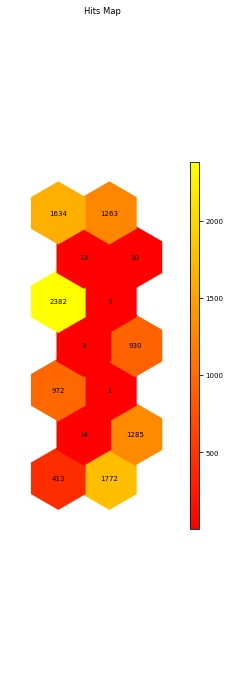

In [367]:
from sompy.visualization.bmuhits import BmuHitsView
sm.codebook.lattice="hexa"
vhts  = BmuHitsView(12,12,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)
plt.show()

როგორც ვხედავთ, როცა მონაცემების რეალური საშუალოები ავიღეთ, ისეთი ლამაზი აღარ გამოვიდა ვიზუალიზაცია როგორიც ცენტროიდებით გამოდიოდა, თუმცა ეს მოსალოდნელიც იყო.

som-ის დასკვნა:
- დაბალი მხარჯველობა დიდ ოჯახიან ადამიანებში უფრო შეინიშნება, რაც შეიძლება გაგვიკვირდეს ერთი შეხედვით, თუმცა როგორც კლასტერების დახასიათებისას გავარკვიეთ, დიდ ოჯახებში დედ-მამიანი ადამიანები ითვლებიან, რომლებიც ამ მონაცემებში უფრო ახალგაზრდები არიან.
- მაღალი მხარჯველობა დამოკიდეუბლია იმაზე დაოჯახებულია თუ არა ადამიანი (თუ არის - მაღალია)
- მაღალი მხარჯველები არიან მოსამართლეები
- საშუალო მხარჯველები არიან ხელოვანები
- სამუშაო გამოცდიელბა არ არის კორელაციაში მაღალ მხარჯველობასთან
- ასაკიანი ადამიანები უფრო მეტს ხარჯავენ

ამ ინფრომაციას თუ შევაჯერებთ ჩვენ მიერ განხილულ კლასტერებთან და მათ დახასიათებებთან, საკმაოდ კარგ კავშირებს დავინახავთ, თუმცა ამჯერად, ვფიქრობ საკმარისია რას გავიხილეთ, შემდეგ ბიზნესის კონკრეტული ამოცანისთვის ჩვენ მიერ დახასიათებულ და დაყოფილ მონაცემებს შესაბამისად გამოიყენებენ